# Lending Club Loan Approval System

## Business Background

Lending Club is a peer-to-peer lending company where individuals can borrow loans, and investors can fund those loans. Lending Club was founded in 2006 by Renaud Laplanche as a peer-to-peer (P2P) lending platform in San Francisco. It was one of the pioneers in the online lending space, where individual borrowers could obtain loans, and individual or institutional investors could invest in these loans to earn interest. The platform allowed for a more direct connection between lenders and borrowers, bypassing traditional banking intermediaries.

Read more here https://en.wikipedia.org/wiki/LendingClub

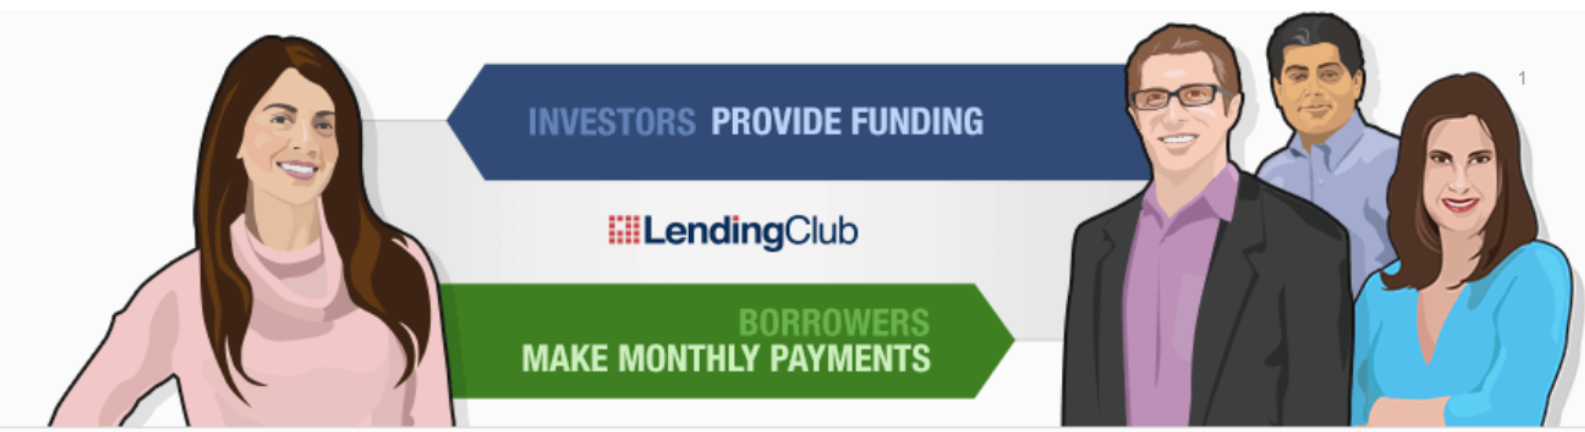

## Problem Statement

Now, whenever *Lending Club* approves a loan, there are two ways in which it is at risk:
- If LC approves a loan and the borrower fails to repay it on time
- If LC rejects a loan despite the borrower being capable of repaying the loan

Defaulting on loans can lead to significant financial losses for both the platform and investors. Similarly, not providing loans to credit-worthy customers can lead to missing out on potential revenue and profits. Therefore, a robust loan approval system is the need of the hour.

In the current loan approval process, underwriters evaluate loan applications by manually reviewing credit scores, income, debt, etc. and then, based on several parameters, either approve or reject a loan. This process is time-consuming and prone to errors.

Hence, Lending Club wants to build a loan approval system using Machine Learning models to automatically assess whether a given loan is likely to be repaid or whether the borrower is likely to default.

This is where you come in! As a budding data scientist, your goal is to help out Lending Club in creating this ML model that helps them predict whether a loan is likely to default or not.

## Data Understanding

You have been provided with around 38k loan application data from the Lending Club's website. The different columns and their description are mentioned below:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

...

## Starter Code

### Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import re
import math

import matplotlib.pyplot as plt

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE


In [2]:
pd.set_option('display.max_columns', None)
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

### Data Loading

In [3]:
## Load the dataset
df = pd.read_csv('~/Desktop/IK/LendingClub/loans.csv', encoding='ISO-8859-1')

In [4]:
## Observe the first few rows
## Do you observe any issues?
df.head()

id  member_id  loan_amnt        term int_rate  installment grade  \
0  1077501  1296599.0     5000.0   36 months   10.65%       162.87     B   
1  1077430  1314167.0     2500.0   60 months   15.27%        59.83     C   
2  1077175  1313524.0     2400.0   36 months   15.96%        84.33     C   
3  1076863  1277178.0    10000.0   36 months   13.49%       339.31     C   
4  1075269  1311441.0     5000.0   36 months    7.90%       156.46     A   

  sub_grade emp_length home_ownership  annual_inc verification_status  \
0        B2  10+ years           RENT     24000.0            Verified   
1        C4   < 1 year           RENT     30000.0     Source Verified   
2        C5  10+ years           RENT     12252.0        Not Verified   
3        C1  10+ years           RENT     49200.0     Source Verified   
4        A4    3 years           RENT     36000.0     Source Verified   

          purpose    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
0     credit_card  27.65          0.0             1.0       3.0      0.0   
1             car   1.00          0.0             5.0       3.0      0.0   
2  small_business   8.72          0.0             2.0       2.0      0.0   
3           other  20.00          0.0             1.0      10.0      0.0   
4         wedding  11.20          0.0             3.0       9.0      0.0   

   revol_bal revol_util  total_acc  last_pymnt_amnt  loan_status  
0    13648.0      83.7%        9.0           171.62   Fully Paid  
1     1687.0       9.4%        4.0           119.66  Charged Off  
2     2956.0      98.5%       10.0           649.91   Fully Paid  
3     5598.0        21%       37.0           357.48   Fully Paid  
4     7963.0      28.3%       12.0           161.03   Fully Paid

In [5]:
## Check the dataframe structure - datatypes and number of non-null rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           37734 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

In [6]:
## Check the shape
df.shape

(38770, 23)

In [7]:
def check_missing_values(df):
    null_counts = df.isna().sum()

    # Calculate the percentage of null values for each column
    # This is done by dividing the null counts by the total number of rows in 'df' (len(df))
    # and multiplying by 100 to convert it to a percentage
    null_percentage = (null_counts / len(df)) * 100

    # Creating a new DataFrame to hold null counts and percentages
    null_summary = pd.DataFrame({
        'Null Count': null_counts,
        'Null Percentage': null_percentage
    })

    # Filtering to only show columns with null values
    null_summary = null_summary[null_summary['Null Count'] > 0]

    # Displaying the null summary DataFrame
    if null_summary.shape[0] > 0:
        print(null_summary)
    else:
        print('No nulls present in dataframe.')
    
check_missing_values(df)

            Null Count  Null Percentage
emp_length        1036         2.672169
revol_util          50         0.128966


#### Observations

- there are several columns that we should take care to remove from the model as they would only have data AFTER the underwriting decision has occured
- we have a combination of both ordinal and non-ordinal cateogorical variables that we should encode appropriately
- grade and sub-grade contain redundant data that we can represent more concisely upon ordinal encoding
- sub-grade is essentially a pre-binned FICO score
- some numerical data is 'corrupted' with non-numerical descriptors (ie. % or 'month') that we should remove so we can cast them into the appropriate numerical type
- emp_length and revol_util have null values.  we'll have to consider how to treat these.  Neither appears large enough to warrant dropping the column completely so we may consider imputing the missing values, at risk of introducing some inaccuracies to the data.
- after properly encoding & removing we can consider re-basing values to span 0 or at least occupy a space similar in magnitude so no one non-dependent variable dominates the model simply due to its magnitude
- term has only two values and could be encoded as an ordinal but we'd lose the information represented by the magnitude of the distance between months

### Data Cleaning

- Perform missing value treatment
- Remove extra symbols, characters, etc. from appropriate columns

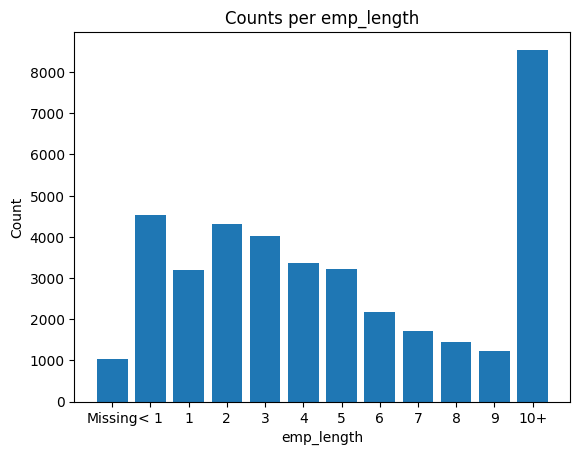

float64 [10.  0.  3.  8.  9.  4.  5.  1.  6.  2.  7.]
            Null Count  Null Percentage
revol_util          50         0.128966


In [8]:
## emp_length
if df['emp_length'].dtype != 'float64':
    # remove 'years'
    df['emp_length'] = df['emp_length'].str.replace(r'\s*year[s]?$', '', regex=True)
    df['emp_length'].unique().tolist()

    # handle nulls
    # visualize distribution
    el_ordered = ['Missing', '< 1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
    counts = df['emp_length'].fillna('Missing').value_counts(dropna=False).reindex(el_ordered)

    plt.bar(counts.index, counts.values)
    plt.xlabel('emp_length')
    plt.ylabel('Count')
    plt.title('Counts per emp_length')
    plt.show()

    # Impute
    # Fill Nulls w/ random sample values
    df['emp_length'] = df['emp_length'].apply(lambda x: np.random.choice(df['emp_length'].dropna()) if pd.isnull(x) else x)

    el_ordered = ['< 1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
    el_encoder = OrdinalEncoder(categories=[el_ordered])
    df['emp_length'] = el_encoder.fit_transform(df[['emp_length']])


print(df['emp_length'].dtype, df['emp_length'].unique())
check_missing_values(df)


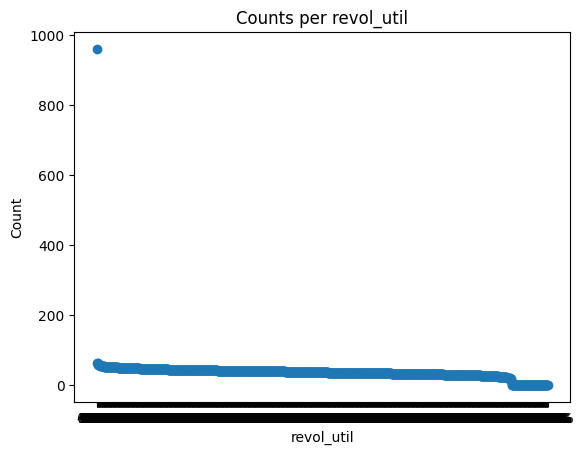

Mode:  0    0%
Name: revol_util, dtype: object
Mode count:  0%    960
Name: revol_util, dtype: int64
No nulls present in dataframe.


In [9]:
#revol_util
# visualize distribution
counts = df['revol_util'].value_counts()

plt.scatter(counts.index, counts.values)
plt.xlabel('revol_util')
plt.ylabel('Count')
plt.title('Counts per revol_util')
plt.show()

ru_mode = df['revol_util'].mode()
print('Mode: ',ru_mode )
print('Mode count: ', counts[ru_mode])
    
# Impute
# Fill nulls w/ mode
# Even though this is ordinal data, the mode overwhelms the data.  moreover, the mode, 0 is most likely equivalent for nulls
imputer = SimpleImputer(strategy='most_frequent')
df['revol_util'] = imputer.fit_transform(df[['revol_util']])

#convert to float
if df['revol_util'].dtype != 'float64':
    df['revol_util'] = df['revol_util'].str.replace('%', '', regex=True).astype(float)

check_missing_values(df)


In [10]:
#term
#convert to integer
try: # to make the code idempotent
    df['term'] = df['term'].str.replace(r'\s*month[s]?$', '', regex=True).astype(int)
except:
    pass

print(df['term'].unique().tolist())

[36, 60]


In [11]:
#int_rate
#convert to float
try: # to make the code idempotent
    df['int_rate'] = df['int_rate'].str.replace('%', '', regex=True).astype(float)
except:
    pass

print(df['int_rate'].unique().tolist())

[10.65, 15.27, 15.96, 13.49, 7.9, 18.64, 21.28, 12.69, 14.65, 9.91, 16.29, 6.03, 11.71, 12.42, 14.27, 16.77, 7.51, 8.9, 18.25, 6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 20.89, 20.3, 23.91, 19.03, 23.13, 22.74, 22.35, 22.06, 24.11, 6.0, 23.52, 22.11, 7.49, 11.99, 5.99, 10.99, 9.99, 18.79, 11.49, 8.49, 15.99, 16.49, 6.99, 12.99, 15.23, 14.79, 5.42, 10.59, 17.49, 15.62, 19.29, 13.99, 18.39, 16.89, 17.99, 20.99, 22.85, 19.69, 20.62, 20.25, 21.36, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07, 11.63, 7.91, 7.42, 11.14, 20.2, 12.12, 19.39, 16.11, 17.54, 22.64, 13.84, 16.59, 17.19, 12.87, 20.69, 9.67, 21.82, 19.79, 18.49, 22.94, 24.59, 24.4, 21.48, 14.82, 14.17, 7.29, 17.88, 20.11, 16.02, 17.51, 13.43, 14.91, 13.06, 15.28, 15.65, 17.14, 11.11, 10.37, 16.4, 7.66, 10.0, 18.62, 10.74, 5.79, 6.92, 9.63, 14.54, 12.68, 19.36, 13.8, 18.99, 21.59, 20.85, 21.22, 19.74, 20.48, 6.91, 12.23, 12.61, 10.36, 6.17, 6.54, 9.25, 16.69, 15.95, 8.88, 13.35, 9.62, 16.32, 12.98, 14.83, 13.72, 14.09, 14.46, 20.03, 17.8, 

In [ ]:
##replace grade & sub-grape with numerical version of the finer of the two
try:
    df = df.drop(columns='grade') # redundant and less fidelity compared to sub_grade
except:
    pass
print(df.columns)

if df['sub_grade'].dtype == 'object': # to make the code idempotent
    grade_mapping = {
        'A1': 1,
        'A2': 2,
        'A3': 3,    
        'A4': 4,
        'A5': 5,
        
        'B1': 6,
        'B2': 7,
        'B3': 8,    
        'B4': 9,
        'B5': 10,
        
        'C1': 11,
        'C2': 12,
        'C3': 13,    
        'C4': 14,
        'C5': 15,

        'D1': 16,
        'D2': 17,
        'D3': 18,    
        'D4': 19,
        'D5': 20,

        'E1': 21,
        'E2': 22,
        'E3': 23,    
        'E4': 24,
        'E5': 25,

        'F1': 26,
        'F2': 27,
        'F3': 28,    
        'F4': 29,
        'F5': 30,

        'G1': 31,
        'G2': 32,
        'G3': 33,    
        'G4': 34,
        'G5': 35,

    }
    # Replace categorical values with numerical equivalents
    df['sub_grade'] = df['sub_grade'].map(grade_mapping)
print(sorted(df['sub_grade'].unique().tolist()))

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_amnt', 'loan_status'],
      dtype='object')
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [13]:
##loan_status
if df['loan_status'].dtype == 'object': # to make the code idempotent
    ls_mapping = {'Charged Off': 0, 'Fully Paid': 1}
    df['loan_status'] = df['loan_status'].map(ls_mapping)

print(df['loan_status'].unique().tolist())
df.head()

[1, 0]


id  member_id  loan_amnt  term  int_rate  installment  sub_grade  \
0  1077501  1296599.0     5000.0    36     10.65       162.87          7   
1  1077430  1314167.0     2500.0    60     15.27        59.83         14   
2  1077175  1313524.0     2400.0    36     15.96        84.33         15   
3  1076863  1277178.0    10000.0    36     13.49       339.31         11   
4  1075269  1311441.0     5000.0    36      7.90       156.46          4   

   emp_length home_ownership  annual_inc verification_status         purpose  \
0        10.0           RENT     24000.0            Verified     credit_card   
1         0.0           RENT     30000.0     Source Verified             car   
2        10.0           RENT     12252.0        Not Verified  small_business   
3        10.0           RENT     49200.0     Source Verified           other   
4         3.0           RENT     36000.0     Source Verified         wedding   

     dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0  27.65          0.0             1.0       3.0      0.0    13648.0   
1   1.00          0.0             5.0       3.0      0.0     1687.0   
2   8.72          0.0             2.0       2.0      0.0     2956.0   
3  20.00          0.0             1.0      10.0      0.0     5598.0   
4  11.20          0.0             3.0       9.0      0.0     7963.0   

   revol_util  total_acc  last_pymnt_amnt  loan_status  
0        83.7        9.0           171.62            1  
1         9.4        4.0           119.66            0  
2        98.5       10.0           649.91            1  
3        21.0       37.0           357.48            1  
4        28.3       12.0           161.03            1

##### Dropping the unnecessary columns

- Columns which are not required for analysis - `id`, `member_id`
- Columns which are not available at the time of loan approval (Check the data dictionary and problem statement to understand this more) - `installment` and `last_pymnt_amnt`

In [14]:
## Drop the above columns
#remove columns
try:
    #not related to independent variable
    df = df.drop(columns='id')
    df = df.drop(columns='member_id')

    #non-a priori
    df = df.drop(columns='installment')
    df = df.drop(columns='last_pymnt_amnt')
except:
    pass

df.columns

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'loan_status'],
      dtype='object')

In [15]:
## Check the dataframe again
df.head()

loan_amnt  term  int_rate  sub_grade  emp_length home_ownership  \
0     5000.0    36     10.65          7        10.0           RENT   
1     2500.0    60     15.27         14         0.0           RENT   
2     2400.0    36     15.96         15        10.0           RENT   
3    10000.0    36     13.49         11        10.0           RENT   
4     5000.0    36      7.90          4         3.0           RENT   

   annual_inc verification_status         purpose    dti  delinq_2yrs  \
0     24000.0            Verified     credit_card  27.65          0.0   
1     30000.0     Source Verified             car   1.00          0.0   
2     12252.0        Not Verified  small_business   8.72          0.0   
3     49200.0     Source Verified           other  20.00          0.0   
4     36000.0     Source Verified         wedding  11.20          0.0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0             1.0       3.0      0.0    13648.0        83.7        9.0   
1             5.0       3.0      0.0     1687.0         9.4        4.0   
2             2.0       2.0      0.0     2956.0        98.5       10.0   
3             1.0      10.0      0.0     5598.0        21.0       37.0   
4             3.0       9.0      0.0     7963.0        28.3       12.0   

   loan_status  
0            1  
1            0  
2            1  
3            1  
4            1

### Exploratory Data Analysis

Let's understand the key drivers of loan default using EDA. This will form the preliminary analysis before we start with our machine learning model building part. We can understand the distributions of different variables, how they are related with loan default and so on.

#### Univariate Analysis

Perform univariate analysis on the following variables. Use visualizations and summary statistics wherever necessary. Document your overall observations as well
- `loan_status`
- `term`
- `grade`
- `purpose`
- `loan_amnt`
- `annual_inc`

*Note* - You can do additional analysis as well

<Figure size 640x480 with 0 Axes>

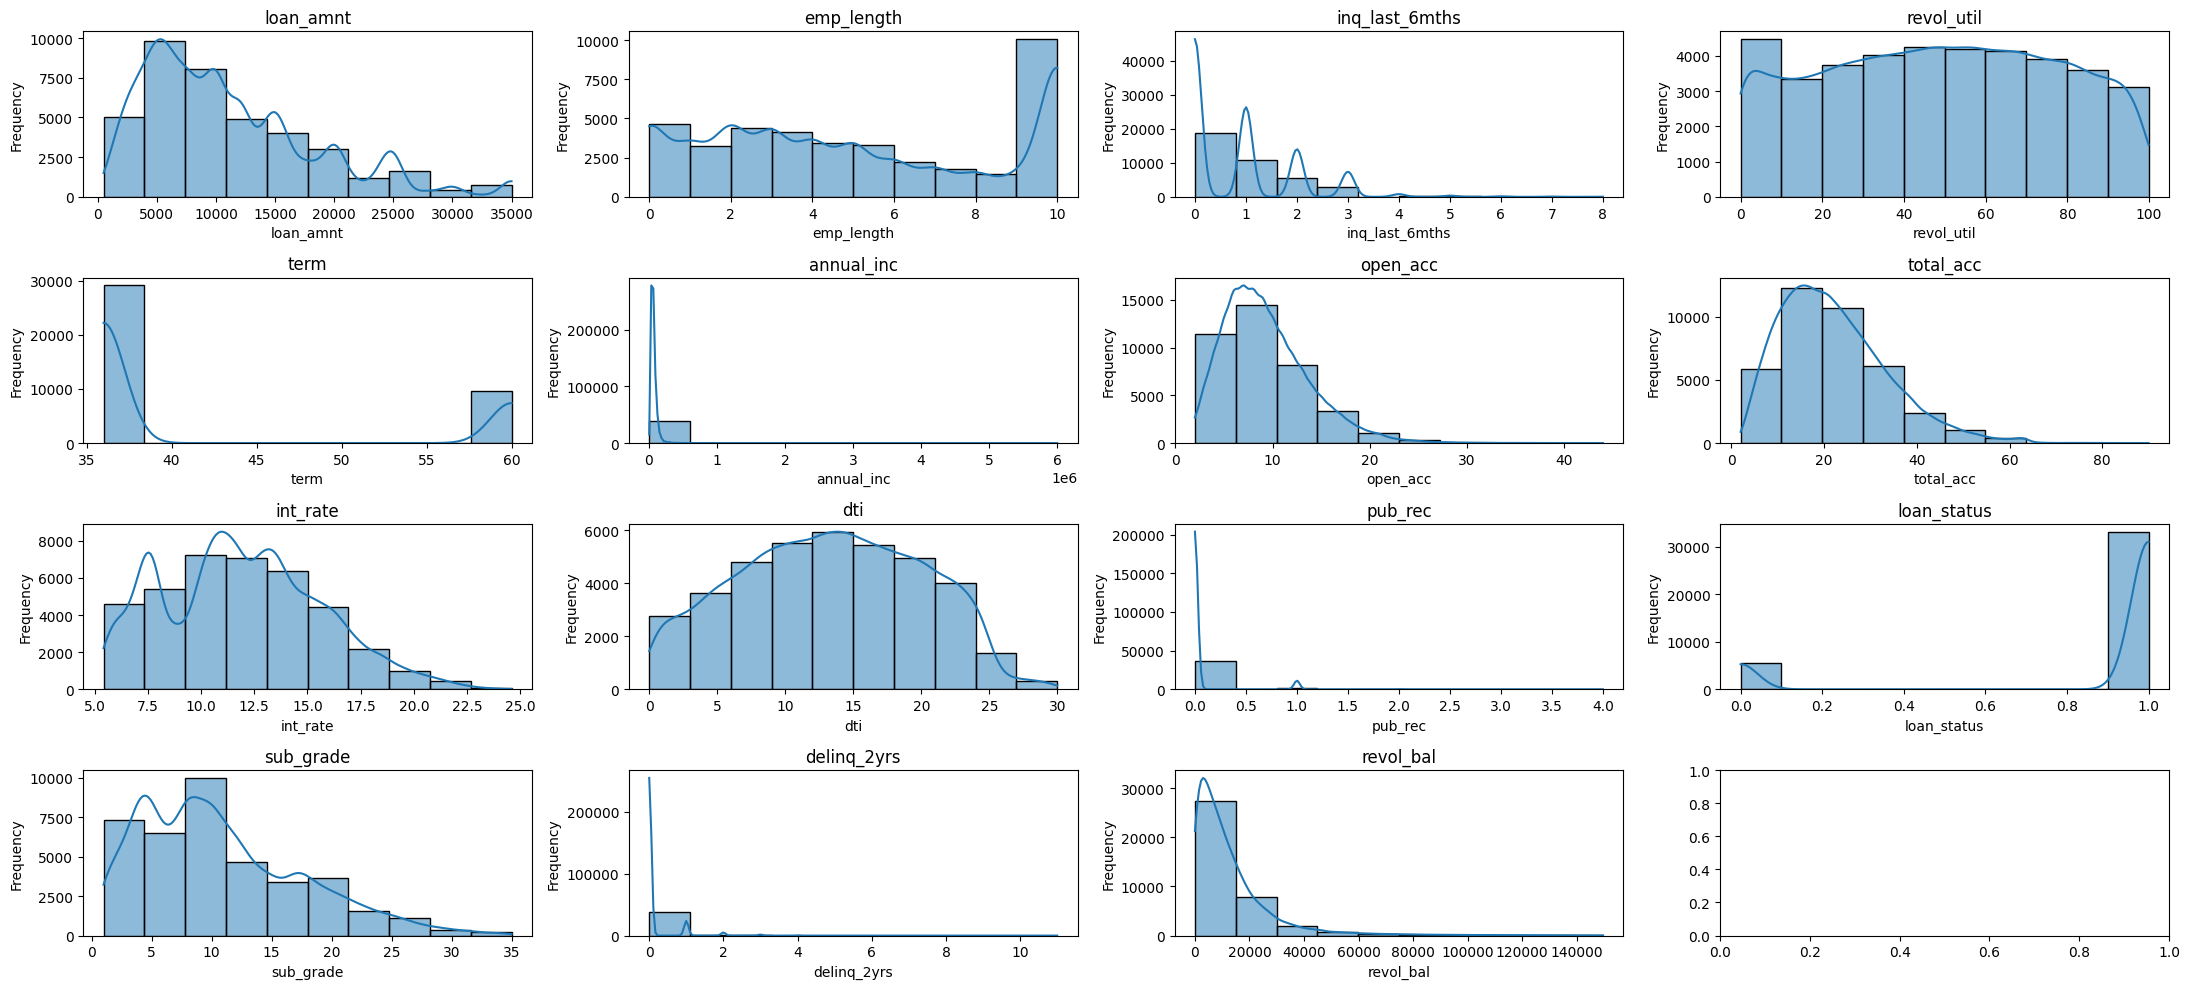

In [16]:
def getNonEncodedCols():
    ho_pattern = r'^home_ownership'
    non_encoded_columns = [s for s in df.columns if not re.match(ho_pattern, s)]
    p_pattern = r'^purpose'
    non_encoded_columns = [s for s in non_encoded_columns if not re.match(p_pattern, s)]
    vs_pattern = r'^verification_status'
    return [s for s in non_encoded_columns if not re.match(vs_pattern, s)]

# Loop through each non-encoded feature in the dataframe and print the value counts in form of histogram
def showCountPlots(myDf, myList):
    plt.clf()
    n = int(math.sqrt(len(myList))) + 1
    fig, axes = plt.subplots(n, n, figsize=(22, 10))

    for i, column in enumerate(myList):
        row_index = i // n  # Determine the row index (integer division)
        column_index = i % n  # Determine the column index (modulo)
        
        axe = axes[column_index][row_index]
        axe.set_title(column)
        axe.set_xlabel(column)  # Set x-axis label
        axe.set_ylabel('Frequency')  # Set y-axis label
        sns.histplot(myDf[column], kde=True, bins=10, ax=axe)  # `bins` specifies the number of bins

    plt.tight_layout()
    plt.show()

showCountPlots(df, getNonEncodedCols())


**Observations**

- `loan_status` - this is the dependent variable.  Charged Off is a loan that we should not underwrite.  Fully Paid is a loan we should underwrite.
- `term` - recorded in months, only 2 values: 36 & 60
- `grade & sub_grade` - Grade is a low-fi version of sub_grade so I've repurposed sub_grade as an ordinal encoding of the values
- `purpose` - String value rationale for the loan.  Now one hot encoded
- `loan_amnt` - In dollars
- `annual_inc` - Also in dollars.  Wide disparity looks like an outlier but is in fact matching our understanding of the nature of the "winner-take-all" economy representative of our modern era.

#### Bivariate Analysis

For the bivariate analysis, you can perform multiple analysis such as follows:

- How the default rate varies across the different variables
- Correlation Matrix
- etc.

Pre-Analysis Intuition
- annual_inc is self reported so if not verified may not be reliable.
- dti and annual_inc are redundant if the income portion is the same.  dti is most likely the more important of the two as it gives us a better idea of the proportion of free capital the borrower has to pay down the loan (1 - dti).  Since annual_inc is not entirely reliable, we may consider dropping it in favor of dti
- amount of revolving line of credit * revol_util = revol_bal.  revol_util gives us an idea of the outstanding debt the borrower is carrying, compared to how much they can carry.  This is similar to dti in that it offers a glimpse at the borrower's risk appetite.  Idea: non-revolving debt proportion = dti - revol_bal/annual_inc = total debt/income - revolving debt/statedincome.  This value should always be >= 0.  If stated income is overstated, the number may be significantly > 0.  If understated, < 0.  We may want to toy with a engineered feature here to help determine the reliability of the annual_inc amount.
- sub_grade is analogous/equivalent to a binned FICO score and should likely dominate whatever model we create.
- emp_length is analgous to a negative decay rate of income.  The reliability of static or increasing income over the life of the loan.
- Interest rate must be pre-calculated by LC.  It can't be selected by the user in an open-ended way or else they'd all select <= 0%.  Consequently, this gives us a proxy for the degree of risk that LC considers the borrower to have.  Should be similar and possibly overlap with the sub_grade score.  In fact, it's kind of cheating because ordinarily this wouldn't be available a priori.  Consequently, I intend to treat it as a second dependent variable to see if we can build not only a decisioning but also a pricing model.

<Figure size 640x480 with 0 Axes>

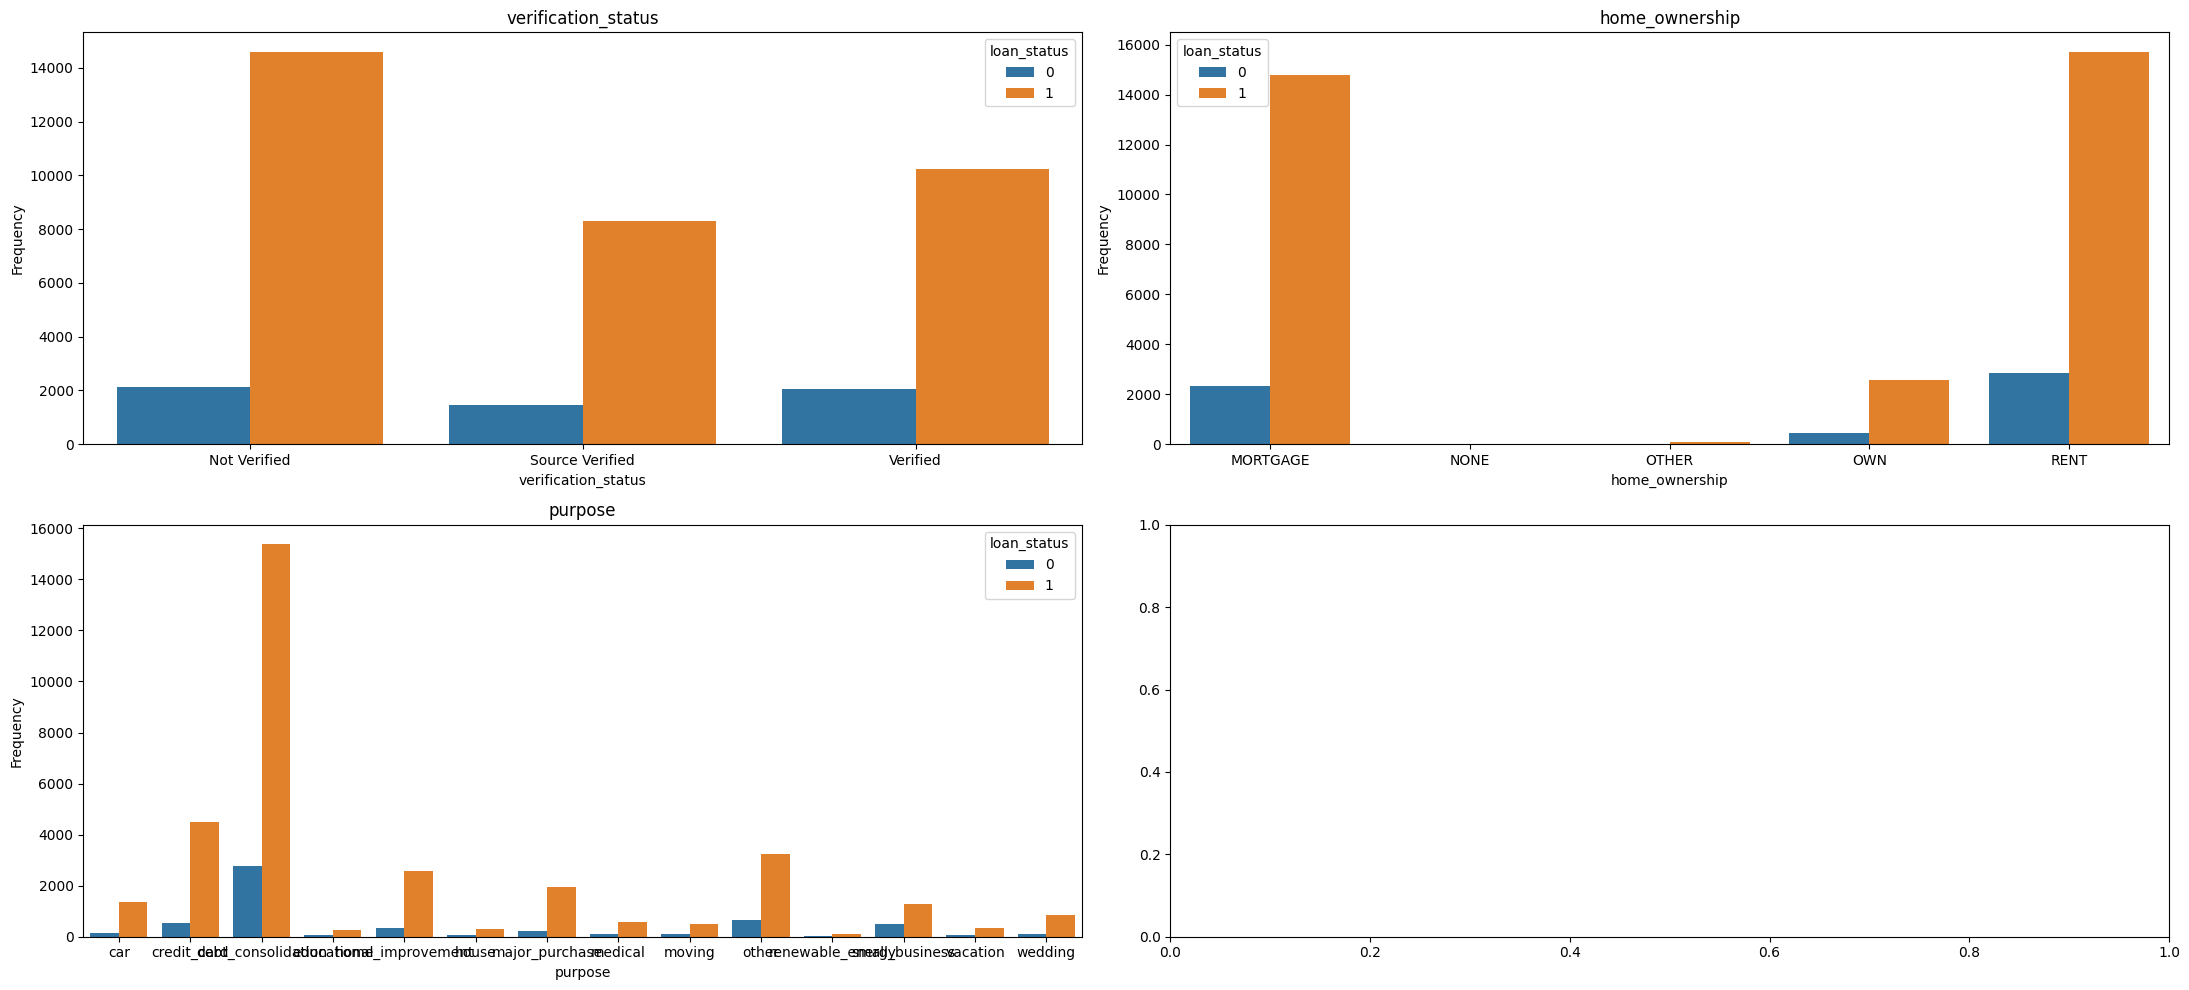

In [17]:
def getEncodedCols():
    return ['verification_status', 'purpose', 'home_ownership']

def showCorrPlots(myDf, myList):
    corrDF = myDf.copy()

    plt.clf()
    n = int(math.sqrt(len(myList))) + 1
    fig, axes = plt.subplots(n, n, figsize=(22, 10))

    for i, column in enumerate(myList):
        row_index = i // n  # Determine the row index (integer division)
        column_index = i % n  # Determine the column index (modulo)
        
        axe = axes[column_index][row_index]
        axe.set_title(column)
        axe.set_xlabel(column)  # Set x-axis label
        axe.set_ylabel('Frequency')  # Set y-axis label

        col_counts = corrDF.groupby([column, 'loan_status']).size().reset_index(name='counts')
        sns.barplot(ax=axe, x=column, y='counts', hue='loan_status', data=col_counts)

    plt.tight_layout()
    plt.show()

showCorrPlots(df, getEncodedCols())

## Observations
- For categorical variables, the proportion of charged off loans appears to consistently mimic the imbalance of the charged-off to not-charged-off values in the loan_status column.  There's little apparent correlation here.

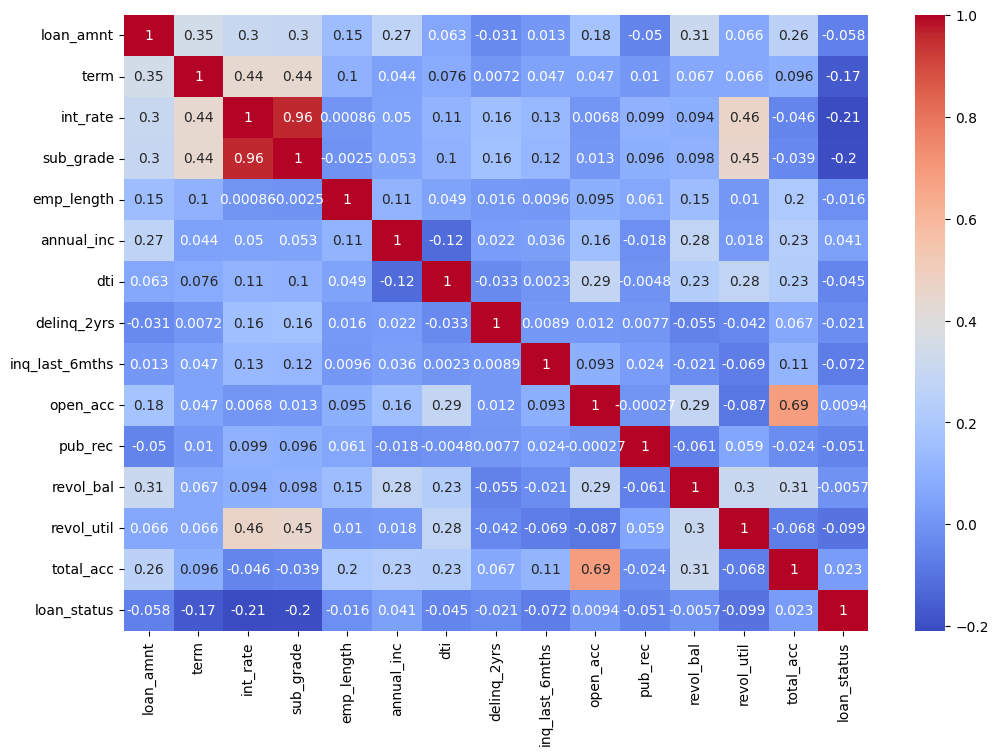

In [18]:
corr_matrix = df[getNonEncodedCols()].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

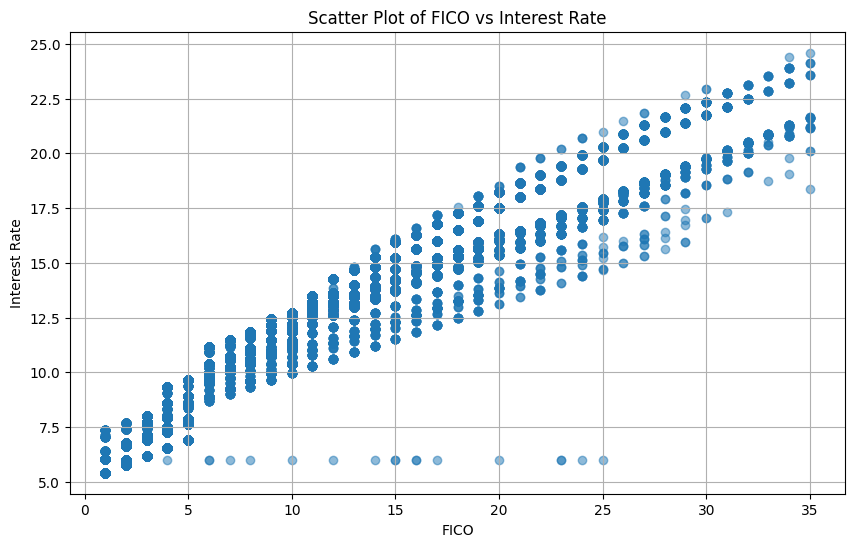

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sub_grade'], df['int_rate'], alpha=0.5)
plt.title('Scatter Plot of FICO vs Interest Rate')
plt.xlabel('FICO')
plt.ylabel('Interest Rate')
plt.grid(True)
plt.show()

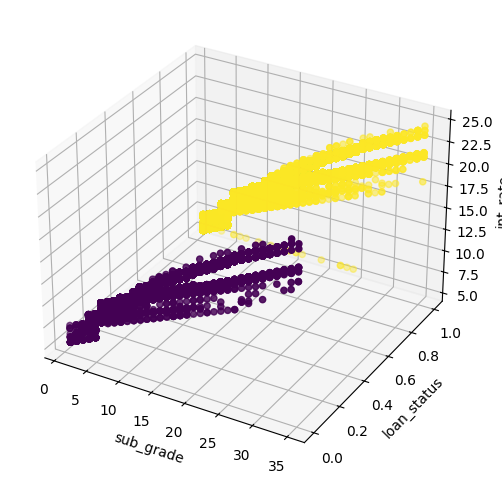

In [20]:
# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['sub_grade'], df['loan_status'], df['int_rate'], c=df['loan_status'], marker='o')

# Set labels
ax.set_xlabel('sub_grade')
ax.set_ylabel('loan_status')
ax.set_zlabel('int_rate')

# Show plot
plt.show()

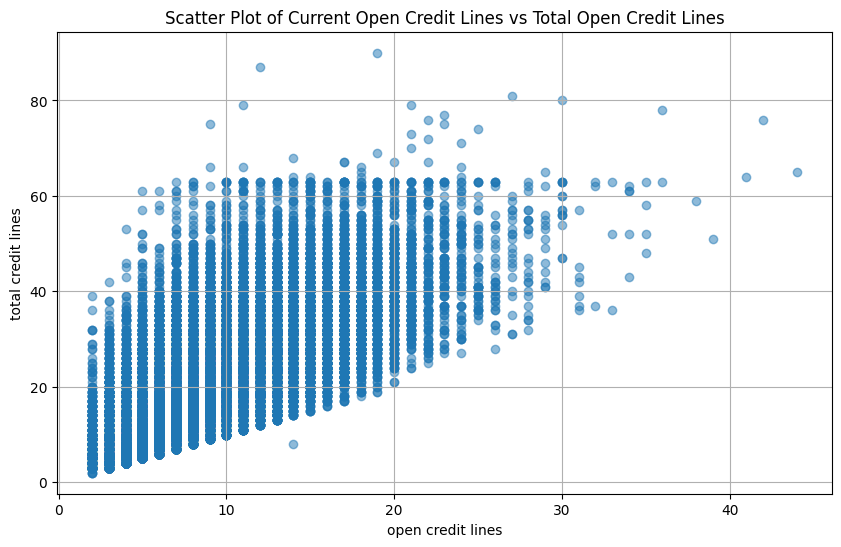

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['open_acc'], df['total_acc'], alpha=0.5)
plt.title('Scatter Plot of Current Open Credit Lines vs Total Open Credit Lines')
plt.xlabel('open credit lines')
plt.ylabel('total credit lines')
plt.grid(True)
plt.show()

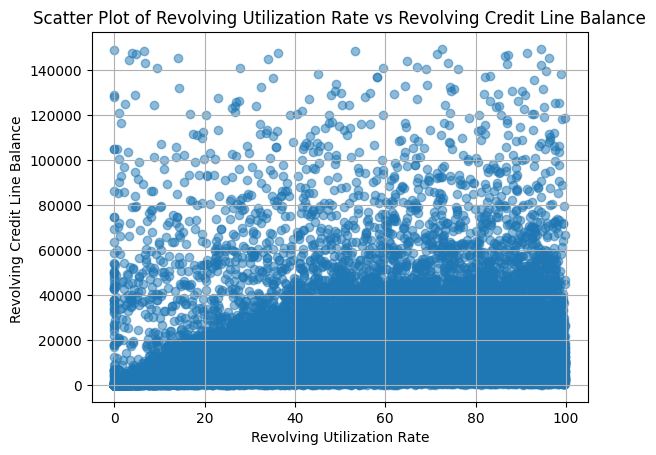

In [22]:
plt.scatter(df['revol_util'], df['revol_bal'], alpha=0.5)
plt.title('Scatter Plot of Revolving Utilization Rate vs Revolving Credit Line Balance')
plt.xlabel('Revolving Utilization Rate')
plt.ylabel('Revolving Credit Line Balance ')
plt.grid(True)
plt.show()

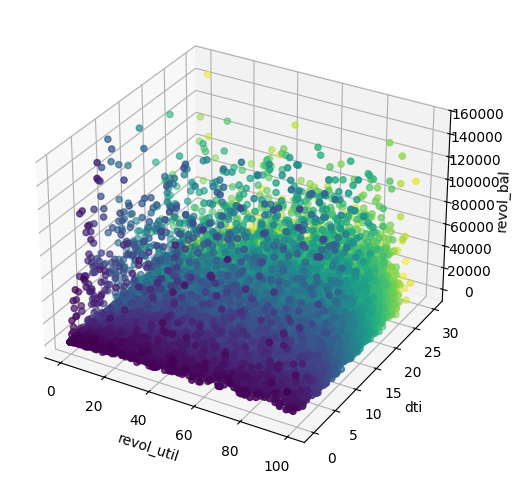

In [23]:
# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['revol_util'], df['dti'], df['revol_bal'], c=df['dti'], marker='o')

# Set labels
ax.set_xlabel('revol_util')
ax.set_ylabel('dti')
ax.set_zlabel('revol_bal')

# Show plot
plt.show()

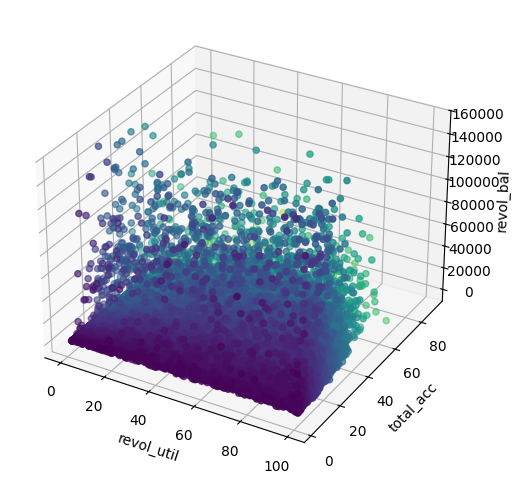

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['revol_util'], df['total_acc'], df['revol_bal'], c=df['total_acc'], marker='o')

# Set labels
ax.set_xlabel('revol_util')
ax.set_ylabel('total_acc')
ax.set_zlabel('revol_bal')

# Show plot
plt.show()

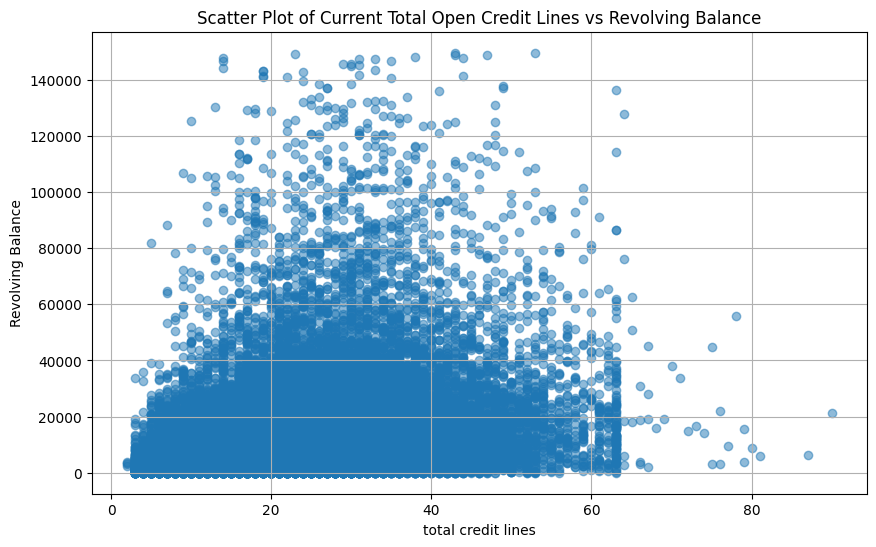

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['total_acc'], df['revol_bal'], alpha=0.5)
plt.title('Scatter Plot of Current Total Open Credit Lines vs Revolving Balance')
plt.xlabel('total credit lines')
plt.ylabel('Revolving Balance')
plt.grid(True)
plt.show()

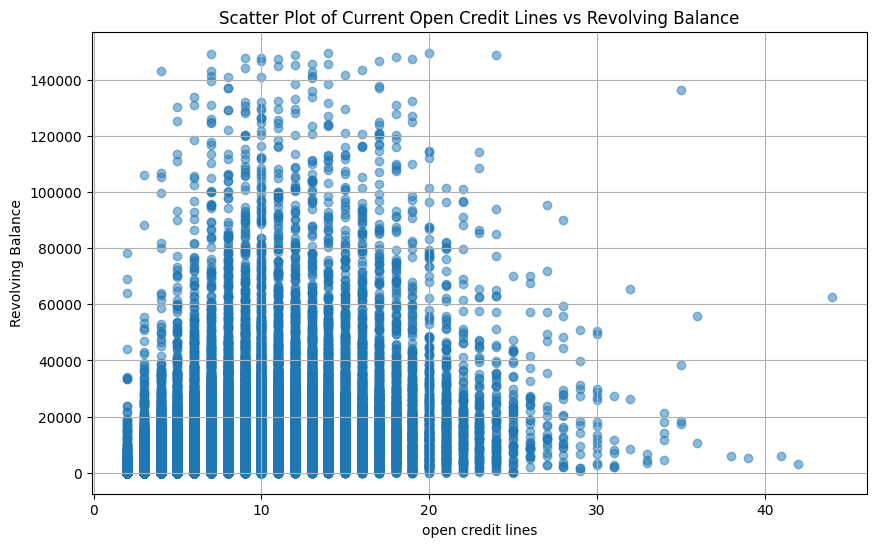

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['open_acc'], df['revol_bal'], alpha=0.5)
plt.title('Scatter Plot of Current Open Credit Lines vs Revolving Balance')
plt.xlabel('open credit lines')
plt.ylabel('Revolving Balance')
plt.grid(True)
plt.show()

## Takeaways
- As expected, interest rate and sub_grade are 96% correlated.  LC's interest rate pricing model is dominated by FICO score.  The missing 4% is important though.  sub_grade captures more information among the two as can be seen in the 3D chart comparing the nearly horizontal line that strays from the correlation present in the Fully Paid set of loans but not in the Charged Off loans.  Intuitively, this makes sense since it's relied upon to keep LC profitable in a competitive market.  Consequently, we should consider dropping sub_grade entirely, in favor of interest rate.
- There's a minimum linear support line for open lines of credit.  total lines = open lines + closed lines.  Above this line, is the body of closed lines.  We may want to tease apart total into open and closed and model these as separate features to remove the correlation between total and open.
- There appears to be a threshold between credit line balance and utilization rate wherein most borrowers reside.  Beyond that the data becomes sparse.  Analyzing across dti, it appears constant. This is counter-intuitive because one would expect utilization and/or balances to drop as a borrower's debt burden (dti) increases.
- It appears that credit line utilization and revolving balances drops off in-step as total and open lines of credit increase.  This pattern appears indicative of borrowers taking on more lines of credit than they need and is intuitive.

#### Pre-ML Data Pre-Processing

Before building the machine learning model, we shall perform
- encoding on all the categorical variables
- scaling
- handle class imbalance
- train-test split

##### Encoding variables

In [27]:
## non-ordinal categoricals
def replaceWithOneHot(df, colName):
    if colName not in df.columns:
        return
    print(df[colName].unique().tolist())
    encoder = OneHotEncoder(sparse_output=False)
    encoded = encoder.fit_transform(df[[colName]])

    # Convert the result to a DataFrame with appropriate column names
    encoded_df = pd.DataFrame(encoded, columns=encoder.categories_[0])
    encoded_df.columns = [colName + '_' + str(col) for col in encoded_df.columns]

    # Concatenate the one-hot encoded columns back to the original DataFrame
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(colName, axis=1, inplace=True)
    return df

# home_ownership
df = replaceWithOneHot(df, 'home_ownership')
df = replaceWithOneHot(df, 'purpose')
df = replaceWithOneHot(df, 'verification_status')

df.head()

['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']
['credit_card', 'car', 'small_business', 'other', 'wedding', 'debt_consolidation', 'home_improvement', 'major_purchase', 'medical', 'moving', 'vacation', 'house', 'renewable_energy', 'educational']
['Verified', 'Source Verified', 'Not Verified']


loan_amnt  term  int_rate  sub_grade  emp_length  annual_inc    dti  \
0     5000.0    36     10.65          7        10.0     24000.0  27.65   
1     2500.0    60     15.27         14         0.0     30000.0   1.00   
2     2400.0    36     15.96         15        10.0     12252.0   8.72   
3    10000.0    36     13.49         11        10.0     49200.0  20.00   
4     5000.0    36      7.90          4         3.0     36000.0  11.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0          0.0             1.0       3.0      0.0    13648.0        83.7   
1          0.0             5.0       3.0      0.0     1687.0         9.4   
2          0.0             2.0       2.0      0.0     2956.0        98.5   
3          0.0             1.0      10.0      0.0     5598.0        21.0   
4          0.0             3.0       9.0      0.0     7963.0        28.3   

   total_acc  loan_status  home_ownership_MORTGAGE  home_ownership_NONE  \
0        9.0            1                      0.0                  0.0   
1        4.0            0                      0.0                  0.0   
2       10.0            1                      0.0                  0.0   
3       37.0            1                      0.0                  0.0   
4       12.0            1                      0.0                  0.0   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  purpose_car  \
0                   0.0                 0.0                  1.0          0.0   
1                   0.0                 0.0                  1.0          1.0   
2                   0.0                 0.0                  1.0          0.0   
3                   0.0                 0.0                  1.0          0.0   
4                   0.0                 0.0                  1.0          0.0   

   purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                  1.0                         0.0                  0.0   
1                  0.0                         0.0                  0.0   
2                  0.0                         0.0                  0.0   
3                  0.0                         0.0                  0.0   
4                  0.0                         0.0                  0.0   

   purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                       0.0            0.0                     0.0   
1                       0.0            0.0                     0.0   
2                       0.0            0.0                     0.0   
3                       0.0            0.0                     0.0   
4                       0.0            0.0                     0.0   

   purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  \
0              0.0             0.0            0.0                       0.0   
1              0.0             0.0            0.0                       0.0   
2              0.0             0.0            0.0                       0.0   
3              0.0             0.0            1.0                       0.0   
4              0.0             0.0            0.0                       0.0   

   purpose_small_business  purpose_vacation  purpose_wedding  \
0                     0.0               0.0              0.0   
1                     0.0               0.0              0.0   
2                     1.0               0.0              0.0   
3                     0.0               0.0              0.0   
4                     0.0               0.0              1.0   

   verification_status_Not Verified  verification_status_Source Verified  \
0                               0.0                                  0.0   
1                               0.0                                  1.0   
2                               1.0                                  0.0   
3                               0.0                                  1.0   
4                               0.0                

##### Feature Engineering

In [28]:

try:
    df['closed_acc'] = df['total_acc'] - df['open_acc']
    df.drop('total_acc', axis=1, inplace=True)
except:
    pass

check_missing_values(df)
df[df['closed_acc'].isnull()]

df.head()

No nulls present in dataframe.


loan_amnt  term  int_rate  sub_grade  emp_length  annual_inc    dti  \
0     5000.0    36     10.65          7        10.0     24000.0  27.65   
1     2500.0    60     15.27         14         0.0     30000.0   1.00   
2     2400.0    36     15.96         15        10.0     12252.0   8.72   
3    10000.0    36     13.49         11        10.0     49200.0  20.00   
4     5000.0    36      7.90          4         3.0     36000.0  11.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0          0.0             1.0       3.0      0.0    13648.0        83.7   
1          0.0             5.0       3.0      0.0     1687.0         9.4   
2          0.0             2.0       2.0      0.0     2956.0        98.5   
3          0.0             1.0      10.0      0.0     5598.0        21.0   
4          0.0             3.0       9.0      0.0     7963.0        28.3   

   loan_status  home_ownership_MORTGAGE  home_ownership_NONE  \
0            1                      0.0                  0.0   
1            0                      0.0                  0.0   
2            1                      0.0                  0.0   
3            1                      0.0                  0.0   
4            1                      0.0                  0.0   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  purpose_car  \
0                   0.0                 0.0                  1.0          0.0   
1                   0.0                 0.0                  1.0          1.0   
2                   0.0                 0.0                  1.0          0.0   
3                   0.0                 0.0                  1.0          0.0   
4                   0.0                 0.0                  1.0          0.0   

   purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                  1.0                         0.0                  0.0   
1                  0.0                         0.0                  0.0   
2                  0.0                         0.0                  0.0   
3                  0.0                         0.0                  0.0   
4                  0.0                         0.0                  0.0   

   purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                       0.0            0.0                     0.0   
1                       0.0            0.0                     0.0   
2                       0.0            0.0                     0.0   
3                       0.0            0.0                     0.0   
4                       0.0            0.0                     0.0   

   purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  \
0              0.0             0.0            0.0                       0.0   
1              0.0             0.0            0.0                       0.0   
2              0.0             0.0            0.0                       0.0   
3              0.0             0.0            1.0                       0.0   
4              0.0             0.0            0.0                       0.0   

   purpose_small_business  purpose_vacation  purpose_wedding  \
0                     0.0               0.0              0.0   
1                     0.0               0.0              0.0   
2                     1.0               0.0              0.0   
3                     0.0               0.0              0.0   
4                     0.0               0.0              1.0   

   verification_status_Not Verified  verification_status_Source Verified  \
0                               0.0                                  0.0   
1                               0.0                                  1.0   
2                               1.0                                  0.0   
3                               0.0                                  1.0   
4                               0.0                                  1.0   

   verification_status_Verified  closed_

##### Scaling

In [29]:
## Deep copy the dataframe to preserve progress so far
df_scaled = df.copy(deep=True)

annual_inc 3.6020599913279625 6.778151250383644
loan_amnt 2.6989700043360187 4.544068044350276
int_rate 0.7339992865383869 1.3907585287387172
sub_grade 0.0 1.5440680443502757
No nulls present in dataframe.


<Figure size 640x480 with 0 Axes>

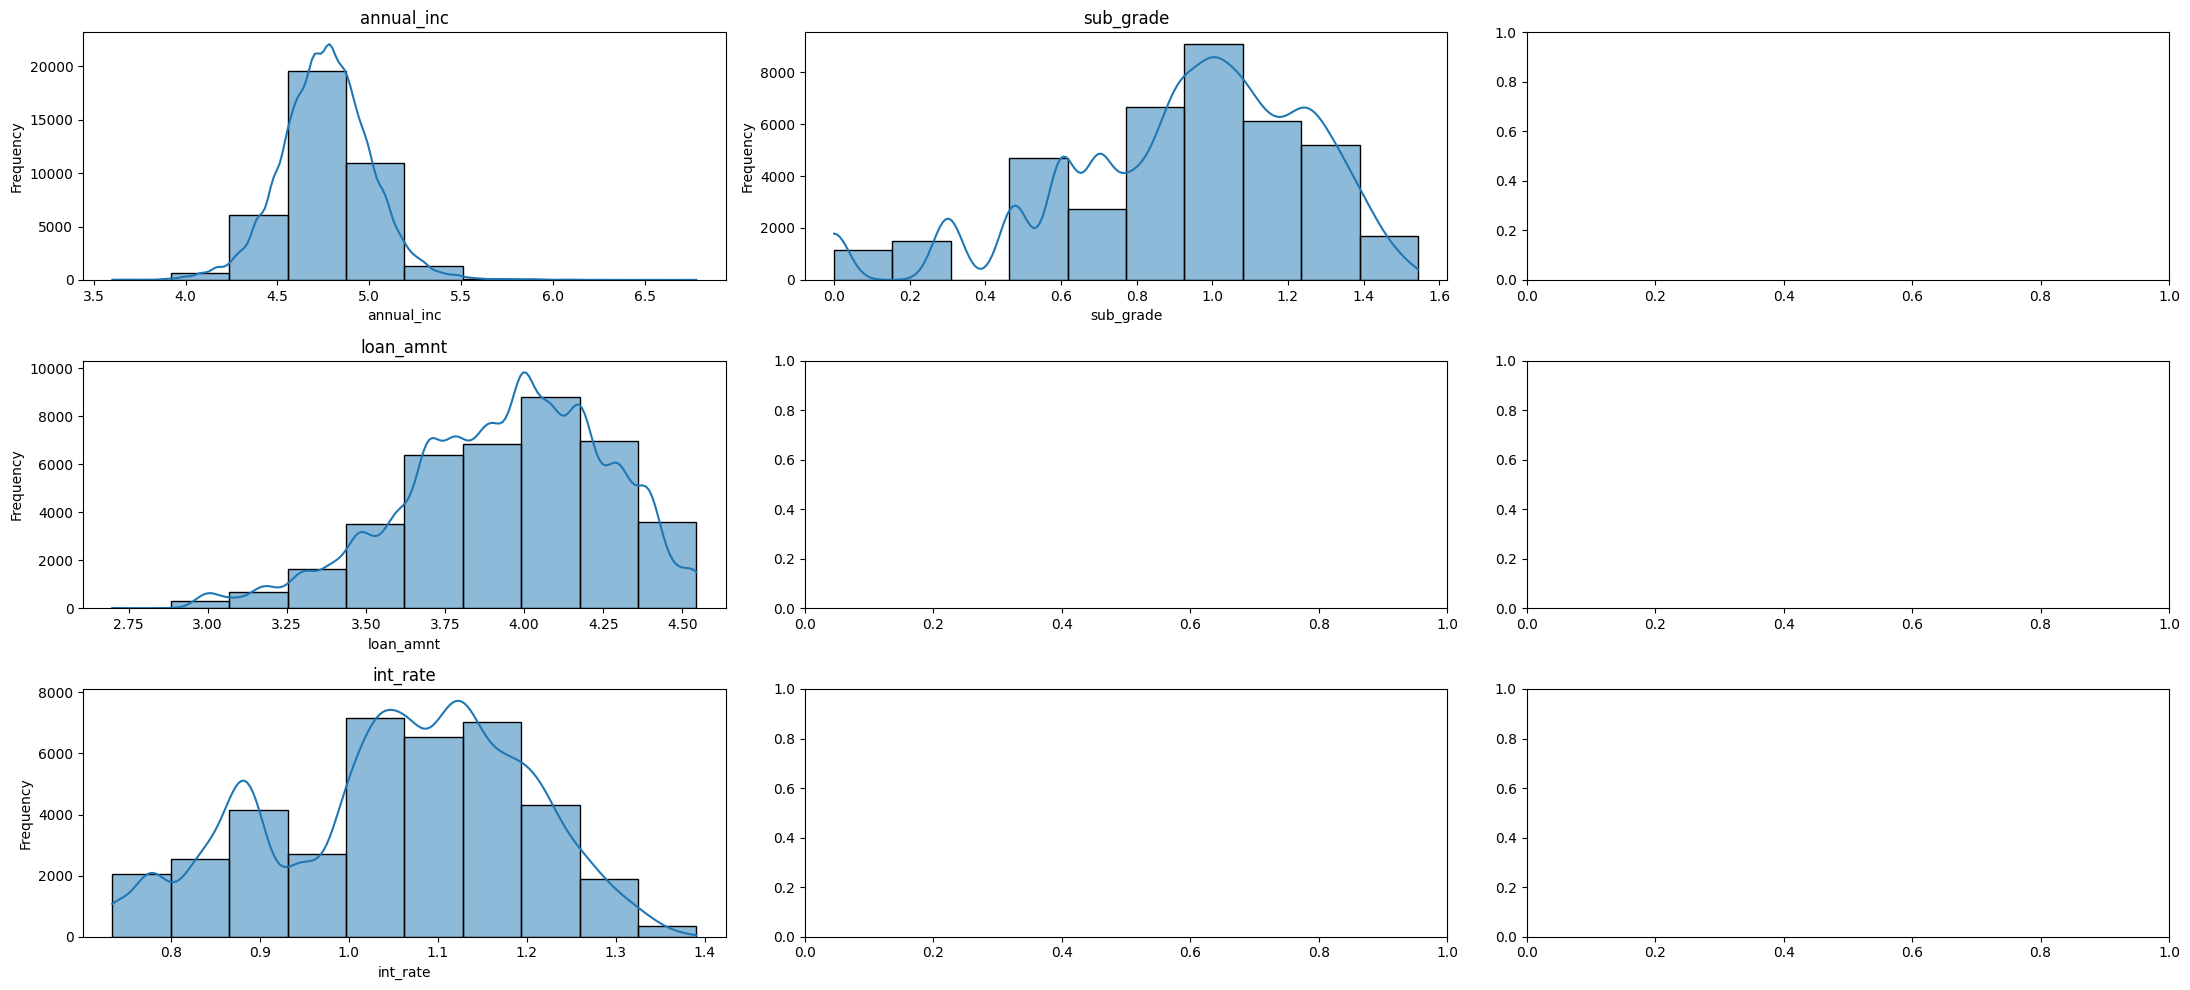

In [30]:
## left skewed features -- apply Log10 scaling
left_skewed_features = ['annual_inc', 'loan_amnt', 'int_rate', 'sub_grade']
log_transformer = FunctionTransformer(np.log10)

for col in left_skewed_features:
    #df_scaled[col] = df_scaled[col].apply(lambda x: np.log10(x) if x > 0 else 0)
    df_scaled[col] = log_transformer.transform(df[[col]])
    vals = sorted(df_scaled[col].unique().tolist())
    print(col, vals[0], vals[-1]) # check that there are no +/-inf

check_missing_values(df_scaled)
showCountPlots(df_scaled, left_skewed_features)

term 0.0 1.0
emp_length 0.0 1.0
dti 0.0 1.0
delinq_2yrs 0.0 1.0
inq_last_6mths 0.0 1.0
open_acc 0.0 0.9999999999999998
pub_rec 0.0 1.0
revol_bal 0.0 1.0
revol_util 0.0 1.0
loan_status 0.0 1.0
closed_acc 0.0 0.9999999999999999
No nulls present in dataframe.


<Figure size 640x480 with 0 Axes>

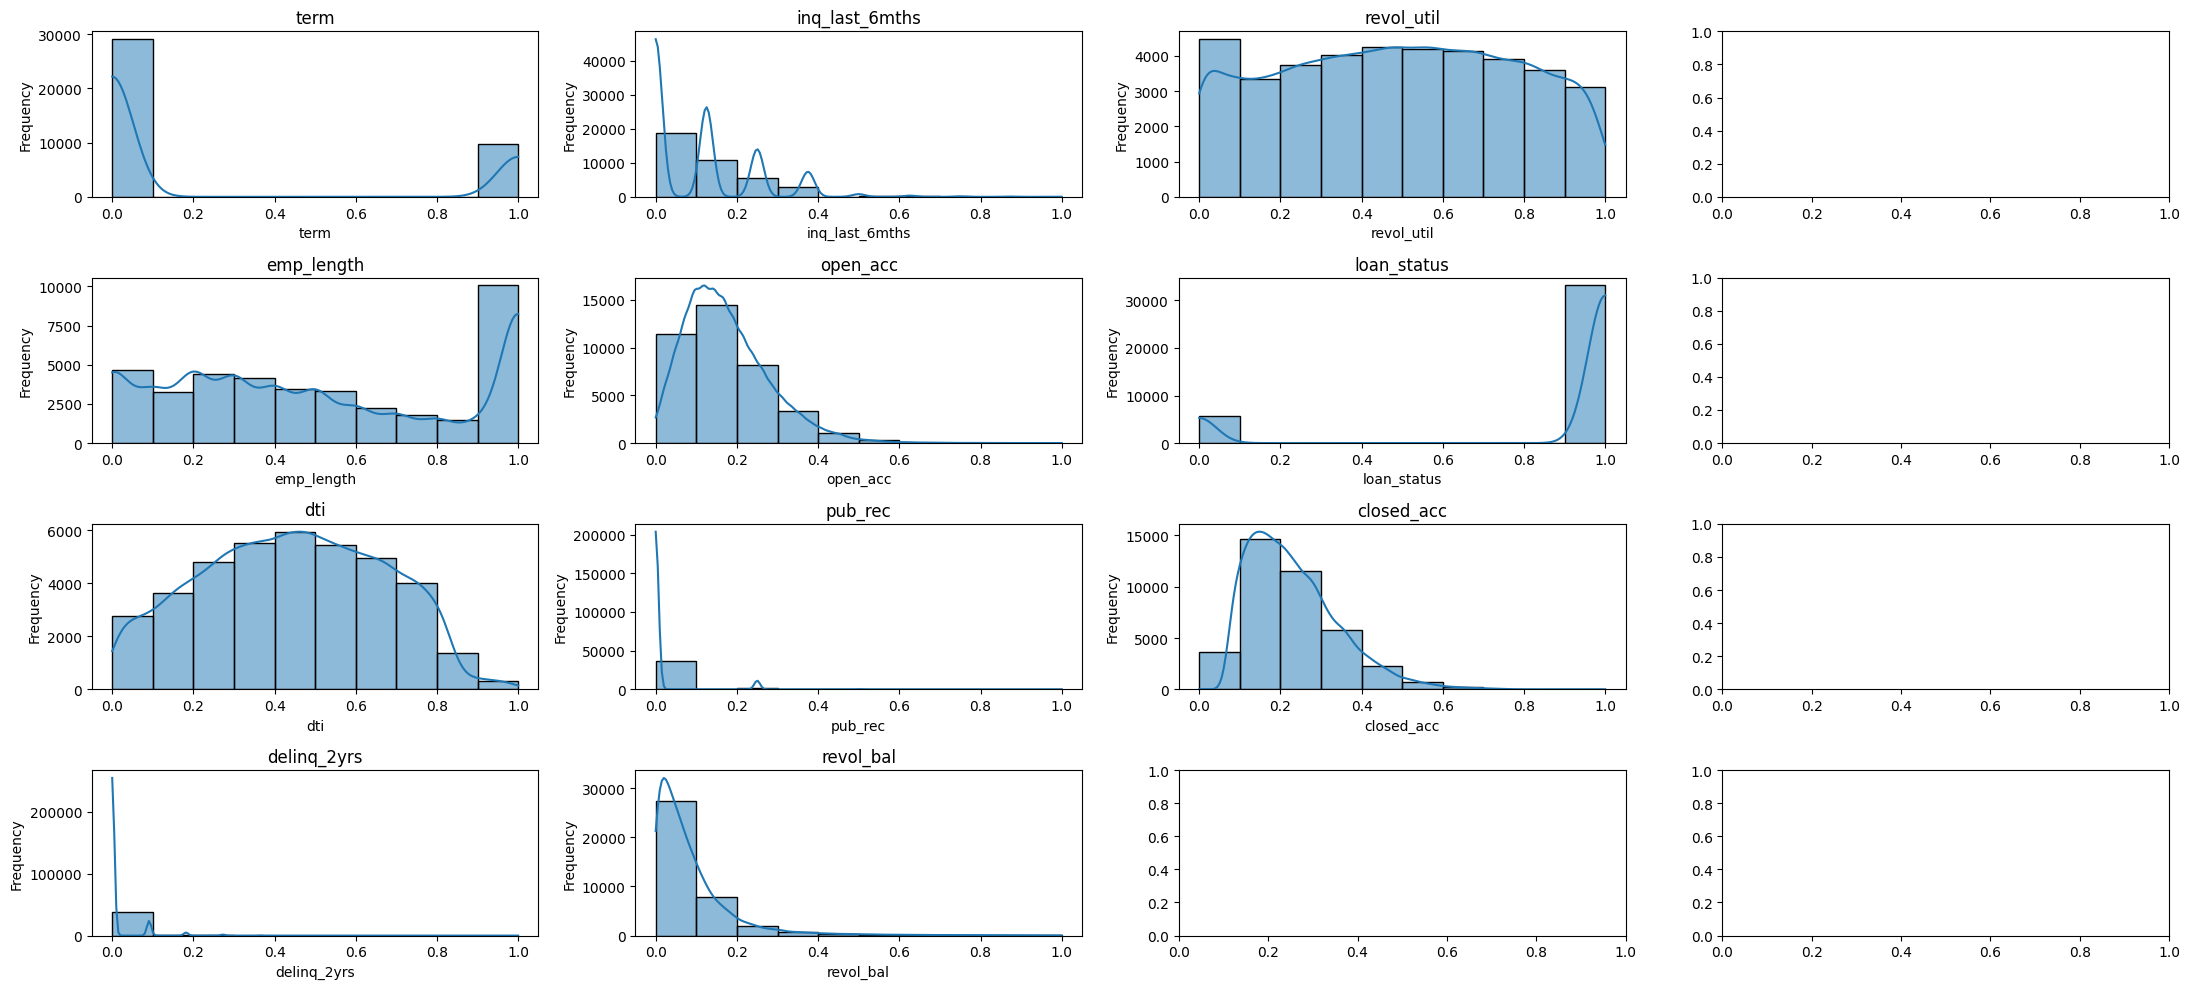

In [31]:
## MinMax Scaling - fit to equivalent scale
non_encoded_columns = getNonEncodedCols()
non_encoded_columns = [s for s in non_encoded_columns if s not in left_skewed_features]
minmax_scaler = MinMaxScaler()
for col in non_encoded_columns:
    df_scaled[col] = minmax_scaler.fit_transform(df[[col]])
    vals = sorted(df_scaled[col].unique().tolist())
    print(col, vals[0], vals[-1]) # check that there are no +/-inf

check_missing_values(df_scaled)
showCountPlots(df_scaled, non_encoded_columns)

**Handling Class Imbalance**

Suggestion - Perform SMOTE here

In [32]:
# Check if there is class imbalance
df_scaled['loan_status'].value_counts(normalize=True)

1.0    0.854681
0.0    0.145319
Name: loan_status, dtype: float64

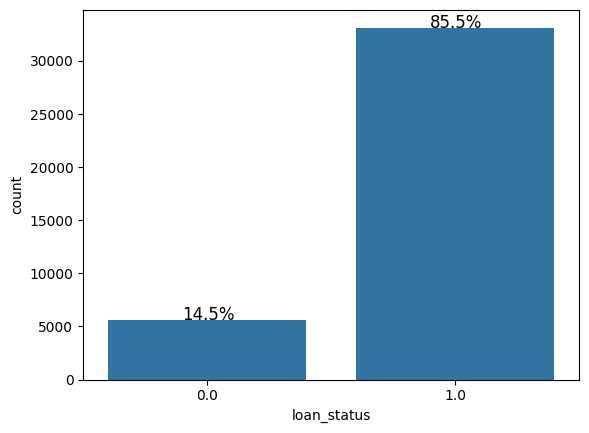

In [33]:
# Create a countplot to check the distribution of the target variable
ax = sns.countplot(x='loan_status', data=df_scaled)

# Get total number of data points
total = df_scaled.shape[0]

# Calculate and add percentage text above each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

plt.show()

In [34]:
# Separating the features and target for loan_status
y = df_scaled["loan_status"]
X = df_scaled.drop(["loan_status"], axis=1)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

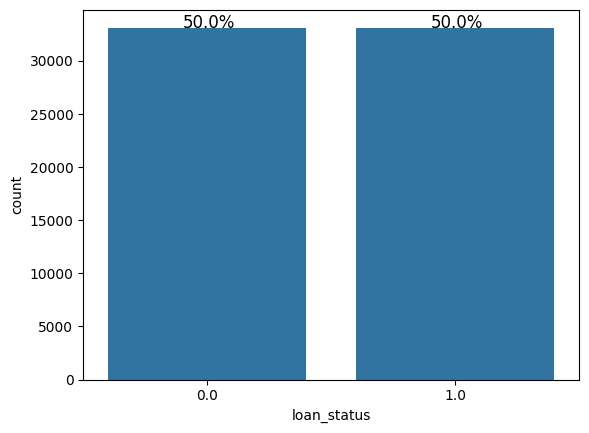

In [35]:
## Check the distribution of class in the newly resampled data
# Create a countplot to check the distribution of the target variable
ax = sns.countplot(x=y_smote, data=X_smote)

# Get total number of data points
total = X_smote.shape[0]

# Calculate and add percentage text above each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

plt.show()

**Train-test split**

Now that we have handled class imbalance, let's perform the train-test split. We have to do a few additional imports

In [36]:
# Splitting our dataset between training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=42)

### Model Building and Model Evaluation

- Your task is to build at least 3 models and evaluate their performance
- Start with a baseline model such as logistic regression
- Build additional models like decision trees, random forests, XGboost, etc.
- Make sure you're checking for overfitting and underfitting
- Use cross-validation and hyperparamater tuning to fit the best models
- Evaluate each of the model using metrics such as accuracy, precision, recall, ROC-AUC score, etc.
- Select the best possible model that you will be using for classfication

### Logistic Regression

Accuracy of Logistic Regression model: 0.6565824217276499
Confusion Matrix:
 [[4508 2178]
 [2374 4195]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      0.67      0.66      6686
         1.0       0.66      0.64      0.65      6569

    accuracy                           0.66     13255
   macro avg       0.66      0.66      0.66     13255
weighted avg       0.66      0.66      0.66     13255



<Figure size 640x480 with 0 Axes>

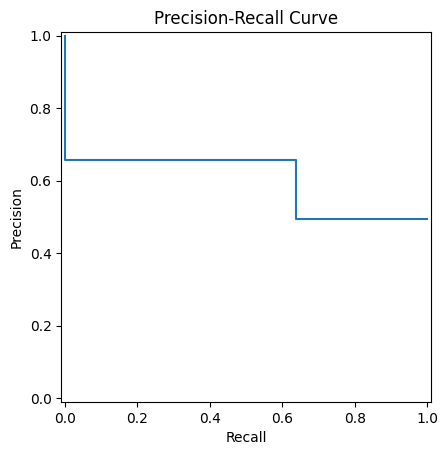


Train Set Metrics:
Precision: 0.6600
Recall: 0.6438
F1 Score: 0.6518
ROC AUC: 0.66

Test Set Metrics:
Precision: 0.6582
Recall: 0.6386
F1 Score: 0.6483
ROC AUC: 0.66


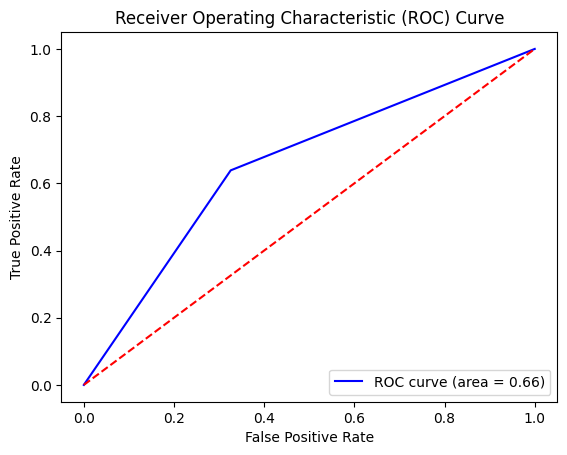

In [41]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, recall_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict probabilities for the test set (to calculate AUC and ROC curve)
y_pred_rf_test = log_reg.predict(X_test)
y_pred_rf_train = log_reg.predict(X_train)

# Compute ROC curve and find the optimal threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_test)

# Find the optimal threshold using Youden's J statistic (maximize TPR - FPR)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Make predictions using the optimal threshold
y_pred = np.where(y_pred_rf_test >= optimal_threshold, 1, 0)

## Plot the Confusion Matrix
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy of Logistic Regression model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

## Plot the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot the Precision-Recall curve
plt.figure()
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.show()

# Report results
print("\nTrain Set Metrics:")
precision_rf_train = precision_score(y_train, y_pred_rf_train)
recall_rf_train = recall_score(y_train, y_pred_rf_train)
f1_rf_train = f1_score(y_train, y_pred_rf_train)
roc_auc_train = roc_auc_score(y_train, y_pred_rf_train)
print(f"Precision: {precision_rf_train:.4f}")
print(f"Recall: {recall_rf_train:.4f}")
print(f"F1 Score: {f1_rf_train:.4f}")
print(f"ROC AUC: {roc_auc_train:.2f}")

precision_rf_test = precision_score(y_test, y_pred_rf_test)
recall_rf_test = recall_score(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test)
roc_auc_test = roc_auc_score(y_test, y_pred_rf_test)
print("\nTest Set Metrics:")
print(f"Precision: {precision_rf_test:.4f}")
print(f"Recall: {recall_rf_test:.4f}")
print(f"F1 Score: {f1_rf_test:.4f}")
print(f"ROC AUC: {roc_auc_test:.2f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Observations:
- **Precision-Recall**: The Precision-Recall curve starts with moderately high precision when recall is low. This indicates that when the model is confident in its predictions (low recall), it makes few false positive errors. Initial Precision holds steady but drops off suddenly to ~1/2 around 2/3 Recall.

- **ROC Curve Shape**: As the model increases its true positive rate, the false positive rate also increases significantly.

- **AUC of 0.66**: This value suggests that the model has moderate discriminative power. It is better than random guessing (AUC = 0.5) but not highly accurate (AUC closer to 1).  The model shows a reliable, yet limited predictive ability.

### KNN


Train Set Metrics:
Precision: 0.9886
Recall: 0.7215
F1 Score: 0.8342
ROC AUC: 0.86

Test Set Metrics:
Precision: 0.9614
Recall: 0.6185
F1 Score: 0.7528
ROC AUC: 0.80


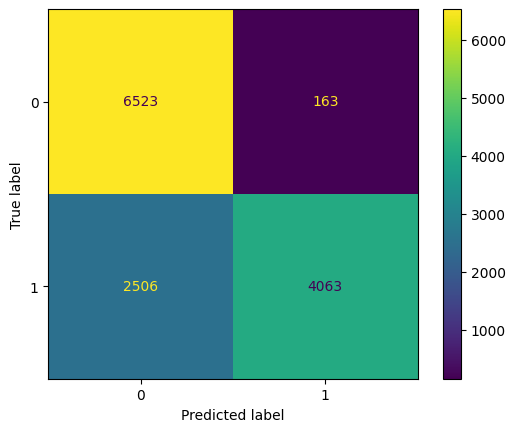

Accuracy of Logistic Regression model: 0.7986420218785364


In [ ]:
def reportResults(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_rf_test = model.predict(X_test)
    y_pred_rf_train = model.predict(X_train)

    print("\nTrain Set Metrics:")
    precision_rf_train = precision_score(y_train, y_pred_rf_train)
    recall_rf_train = recall_score(y_train, y_pred_rf_train)
    f1_rf_train = f1_score(y_train, y_pred_rf_train)
    roc_auc_train = roc_auc_score(y_train, y_pred_rf_train)
    print(f"Precision: {precision_rf_train:.4f}")
    print(f"Recall: {recall_rf_train:.4f}")
    print(f"F1 Score: {f1_rf_train:.4f}")
    print(f"ROC AUC: {roc_auc_train:.2f}")

    precision_rf_test = precision_score(y_test, y_pred_rf_test)
    recall_rf_test = recall_score(y_test, y_pred_rf_test)
    f1_rf_test = f1_score(y_test, y_pred_rf_test)
    roc_auc_test = roc_auc_score(y_test, y_pred_rf_test)
    print("\nTest Set Metrics:")
    print(f"Precision: {precision_rf_test:.4f}")
    print(f"Recall: {recall_rf_test:.4f}")
    print(f"F1 Score: {f1_rf_test:.4f}")
    print(f"ROC AUC: {roc_auc_test:.2f}")

    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_rf_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='viridis')  # Optional: Change colormap
    plt.show()

    accuracy = accuracy_score(y_test, y_pred_rf_test)
    print("Accuracy of Logistic Regression model:", accuracy)

#Import modules
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

reportResults(knn, X_train, y_train, X_test, y_test)

### Observations:
- We observe a much improved Precision but comparable Recall score.  The F1 and ROC AUC scores are also improved.
- Let's keep trying other models for comparison.

### Random Forest


Train Set Metrics:
Precision: 0.9977
Recall: 0.9959
F1 Score: 0.9968
ROC AUC: 1.00

Test Set Metrics:
Precision: 0.8934
Recall: 0.8628
F1 Score: 0.8779
ROC AUC: 0.88


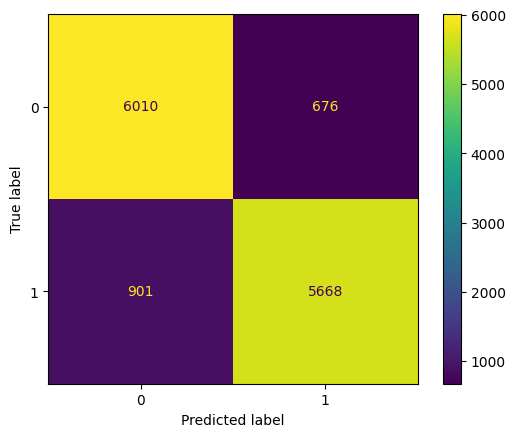

Accuracy of Logistic Regression model: 0.8810260279139948


In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
reportResults(rf, X_train, y_train, X_test, y_test)

#### Observations
- The Training Set delivers close to perfect results while the Test Set is an improvement but not as strong.  There's likely a bit of over-fitting here.
- Let's see if we can further improve it with Hyper-parameter tuning.

### Random Forest w/ Hyper-parameter Tuning

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   4.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   4.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   4.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   4.9s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   3.0s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   3.2s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total t

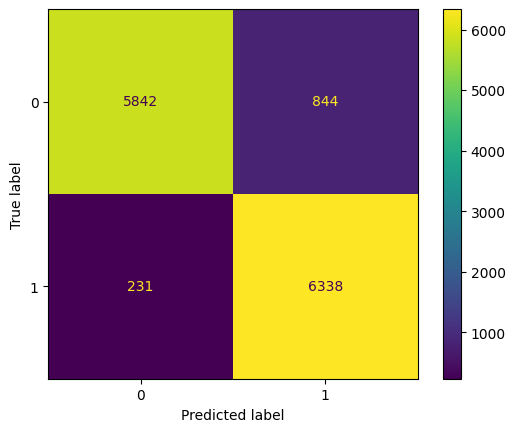

Accuracy of Logistic Regression model: 0.918898528857035


In [45]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
# Define the hyperparameters
n_estimators = [5,20,50,100] # Number of trees in the forest
max_features = ['auto', 'sqrt'] # Number of features to consider at each split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # Maximum depth of each tree
min_samples_split = [2, 6, 10] # Minimum number of samples required to split an internal node
min_samples_leaf = [1, 3, 4] # Minimum number of samples required to be at a leaf node
bootstrap = [True, False] # Method for sampling data points (True for bootstrap sampling, False otherwise)

param_grid = {
    'n_estimators': n_estimators,           # Number of trees in the forest
    'max_features': max_features,           # Number of features to consider at each split
    'max_depth': max_depth,                 # Maximum depth of each tree
    'min_samples_split': min_samples_split, # Minimum number of samples required to split an internal node
    'min_samples_leaf': min_samples_leaf,   # Minimum number of samples required to be at a leaf node
    'bootstrap': bootstrap                  # Method for sampling data points (True for bootstrap sampling, False otherwise)
}

# Initialize the Random Forest model
model = RandomForestClassifier()

# Set up the RandomizedSearchCV with the Random Forest model and hyperparameter grid
search_rf = RandomizedSearchCV(
    estimator = model,                     # The model to tune (Random Forest in this case)
    param_distributions = param_grid,     # The hyperparameter grid to sample from
    n_iter = 100,                          # Number of different combinations to try (iterations)
    cv = 5,                                # Number of folds for cross-validation
    verbose = 2,                           # Controls the verbosity: higher numbers give more details
    random_state = 35,                     # Ensures reproducibility by setting a random seed
    n_jobs = -1                            # Utilizes all available processors for parallel computation
)

# Fit the RandomizedSearchCV on the training data
search_rf.fit(X_train, y_train) #X_train_array

# Get the best parameters and best estimator
best_est = search_rf.best_estimator_
best_params = search_rf.best_params_

# Initialize the best model with the best hyperparameters from RandomizedSearchCV
best_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],            # Best number of trees
    min_samples_split=best_params['min_samples_split'],  # Best min samples required to split an internal node
    min_samples_leaf=best_params['min_samples_leaf'],    # Best min samples required at a leaf node
    max_features=best_params['max_features'],            # Best number of features to consider at each split
    max_depth=best_params['max_depth'],                  # Best maximum depth of each tree
    bootstrap=best_params['bootstrap']                   # Best bootstrap sampling setting
)
reportResults(best_model, X_train, y_train, X_test, y_test)

Accuracy: 0.915 (0.004)


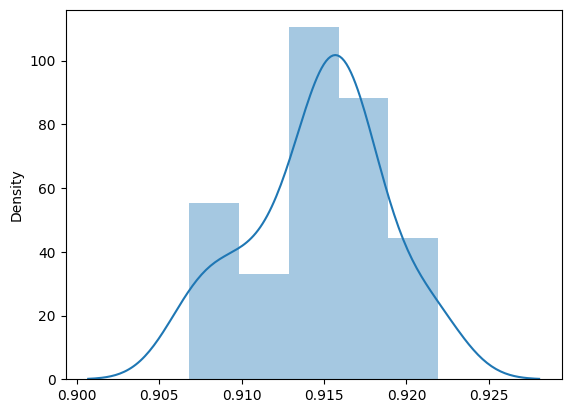

In [46]:
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, cross_val_score

def crossValidate(model, X_train, y_train):
    # Set up the cross-validation method with repeated stratified k-fold
    cv = RepeatedStratifiedKFold(
        n_splits=10,                # Number of folds in each round of cross-validation
        n_repeats=3,                # Number of times the cross-validation process is repeated
        random_state=1              # Ensures reproducibility by setting a random seed
    )

    # Evaluate the model using cross-validation
    n_scores = cross_val_score(
        model,                 # The model to evaluate
        X_train,                          # Features dataset
        y_train,                          # Target labels
        scoring='accuracy',         # Scoring metric to use (accuracy in this case)
        cv=cv,                      # Cross-validation strategy
        n_jobs=-1,                  # Utilize all available processors for parallel computation
        error_score='raise'         # Raise an error if a problem occurs during scoring
    )

    # Report the performance of the model
    print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

    # Plot the distribution of cross-validation scores
    sns.distplot(n_scores)

crossValidate(best_model, X_train, y_train)

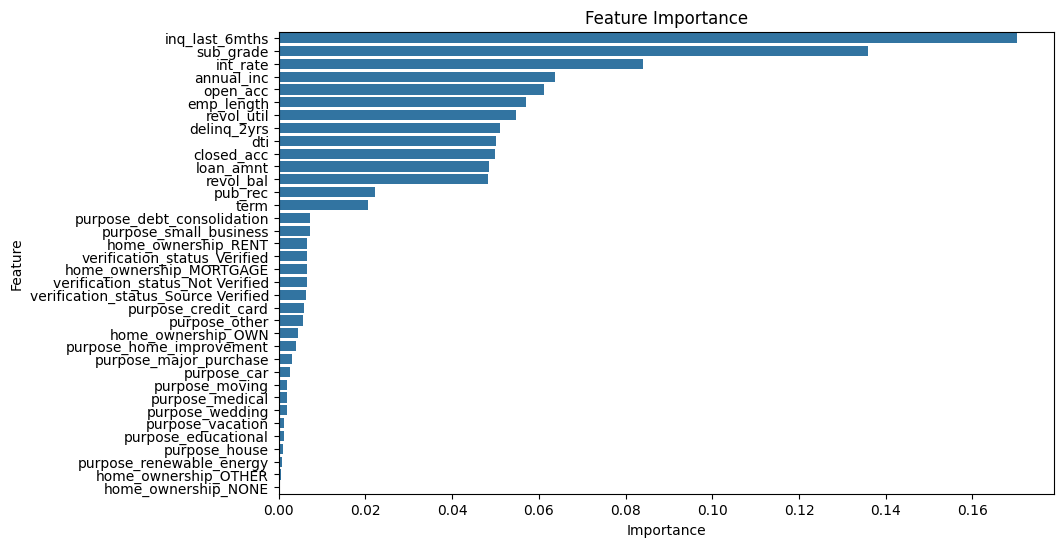

In [47]:
def plot_feature_importance(X, model):
    # Extract feature importances
    importances = model.feature_importances_
    # Get feature names
    feature_names = X.columns

    # Create a Series with feature names as the index
    feature_importance_series = pd.Series(importances, index=feature_names)

    # Sort the Series by importance
    feature_importance_series = feature_importance_series.sort_values(ascending=False)

    # Plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_series, y=feature_importance_series.index)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()

# Plot the feature importance based on the fitted model
plot_feature_importance(X_test, best_model)

### Observations:
- 91.6 accuracy with a close distribution around the mean.  Not only is the model accurate but also consistently so.
- We could push this to a potentially even better result using GridSearch but it's computationally expensive and for academic purposes I'm satisfied with this result so far.

### XGBoost


Train Set Metrics:
Precision: 0.8850
Recall: 0.9967
F1 Score: 0.9375
ROC AUC: 0.93

Test Set Metrics:
Precision: 0.8560
Recall: 0.9784
F1 Score: 0.9131
ROC AUC: 0.91


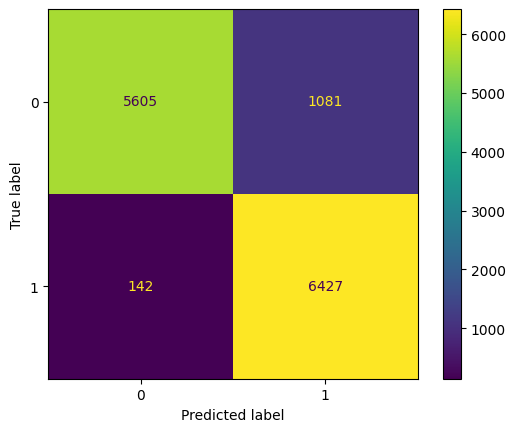

Accuracy of Logistic Regression model: 0.9077329309694455


In [48]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
reportResults(xgb_model, X_train, y_train, X_test, y_test)

#### Observations
- The Test Set performs nearly as well as the Training Set here.  Little risk of over-fitting.
- XGBoost performs comparably to Random Forest.  Let's see how far we can take it with Hyper-parameter tuning.

### XGBoost w/ Hyper-parameter Tuning


Train Set Metrics:
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.00

Test Set Metrics:
Precision: 0.8765
Recall: 0.9688
F1 Score: 0.9203
ROC AUC: 0.92


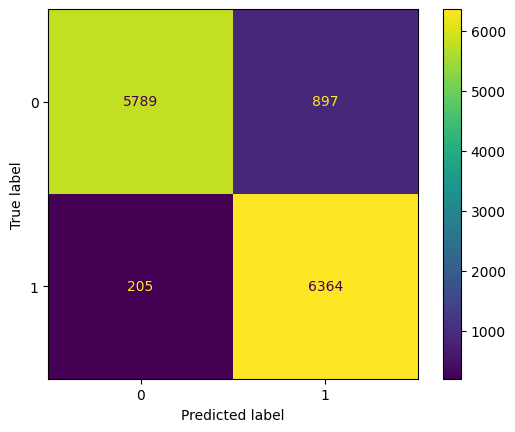

Accuracy of Logistic Regression model: 0.9168615616748397


In [ ]:
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

xgb_model = xgb.XGBClassifier(random_state=1234, use_label_encoder=True, #use_label_encoder=False,
                              scale_pos_weight=8, eval_metric='logloss')

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,#param_dist,
                                   n_iter=50, scoring='f1', cv=5, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_xgb_model = random_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Initialize the best model with the best hyperparameters from RandomizedSearchCV
best_model = xgb.XGBClassifier(
    n_estimators=best_params['n_estimators'],            # Best number of trees
    min_samples_split=best_params['min_samples_split'],  # Best min samples required to split an internal node
    min_samples_leaf=best_params['min_samples_leaf'],    # Best min samples required at a leaf node
    max_features=best_params['max_features'],            # Best number of features to consider at each split
    max_depth=best_params['max_depth'],                  # Best maximum depth of each tree
    bootstrap=best_params['bootstrap']                   # Best bootstrap sampling setting
)

reportResults(best_model, X_train, y_train, X_test, y_test)


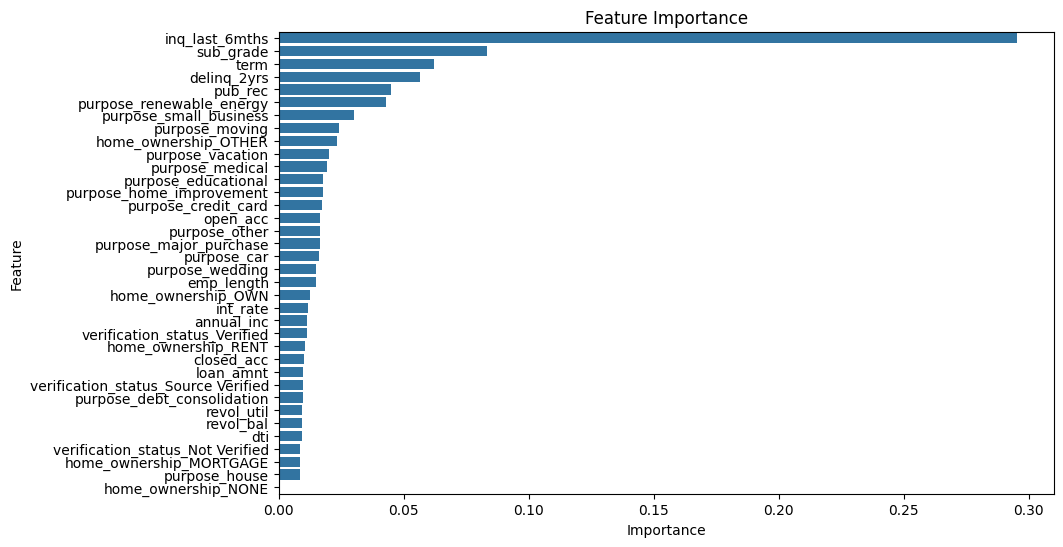

/usr/local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:33:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:33:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:33:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:33:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 

Accuracy: 0.914 (0.004)


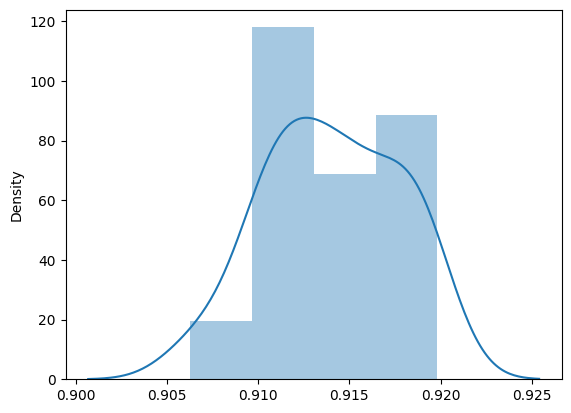

In [51]:
plot_feature_importance(X_test, best_model)
crossValidate(best_model, X_train, y_train)

### Observations:
- At 91.4 accuracy, this model is nearly as strong as the Random Forest.
- The spread around the result is tight with a slight skew right.
- The test set had a perfect score, indicating a possibility of overfitting.  However, the test dataset produced high quality results.
- A single feature, inq_last_6mths has a strong dominance of this model, making it very sensative to change in this value.  The Random Forest also displays dominance by this field but not to the same degree.  It's therefore likely more robust among the two.


### Decision Tree w/ AdaBoost


Train Set Metrics:
Precision: 0.7700
Recall: 0.8767
F1 Score: 0.8199
ROC AUC: 0.81

Test Set Metrics:
Precision: 0.7695
Recall: 0.8752
F1 Score: 0.8189
ROC AUC: 0.81


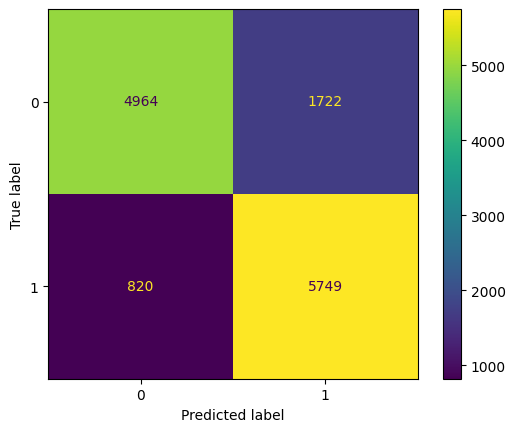

Accuracy of Logistic Regression model: 0.8082233119577518


In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)
reportResults(adaboost, X_train, y_train, X_test, y_test)

### Observations:
- The results are not as good as XGBoost or Random Forest

### Decision Tree w/ Gradient Boost


Train Set Metrics:
Precision: 0.8120
Recall: 0.9574
F1 Score: 0.8787
ROC AUC: 0.87

Test Set Metrics:
Precision: 0.8098
Recall: 0.9540
F1 Score: 0.8760
ROC AUC: 0.87


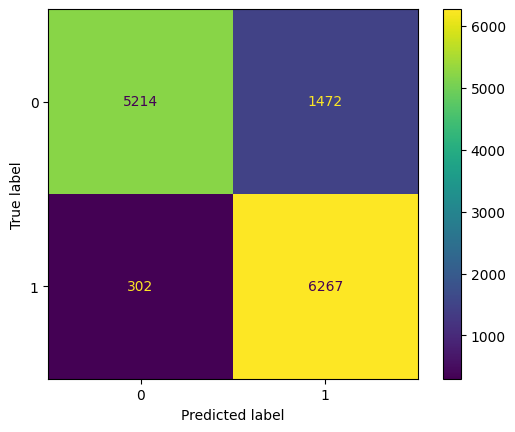

Accuracy of Logistic Regression model: 0.8661637118068654


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(
    n_estimators=100,       # Number of boosting stages (trees)
    learning_rate=0.1,      # Step size shrinkage used to prevent overfitting
    max_depth=3,            # Maximum depth of individual trees
    random_state=42         # Seed for reproducibility
)
reportResults(gb_model, X_train, y_train, X_test, y_test)

### Observations:
- Another decent result, but not as good as XGBoost or Random Forest

# Linear Regression of Interest Rate

annual_inc 3.6020599913279625 6.778151250383644
No nulls present in dataframe.


<Figure size 640x480 with 0 Axes>

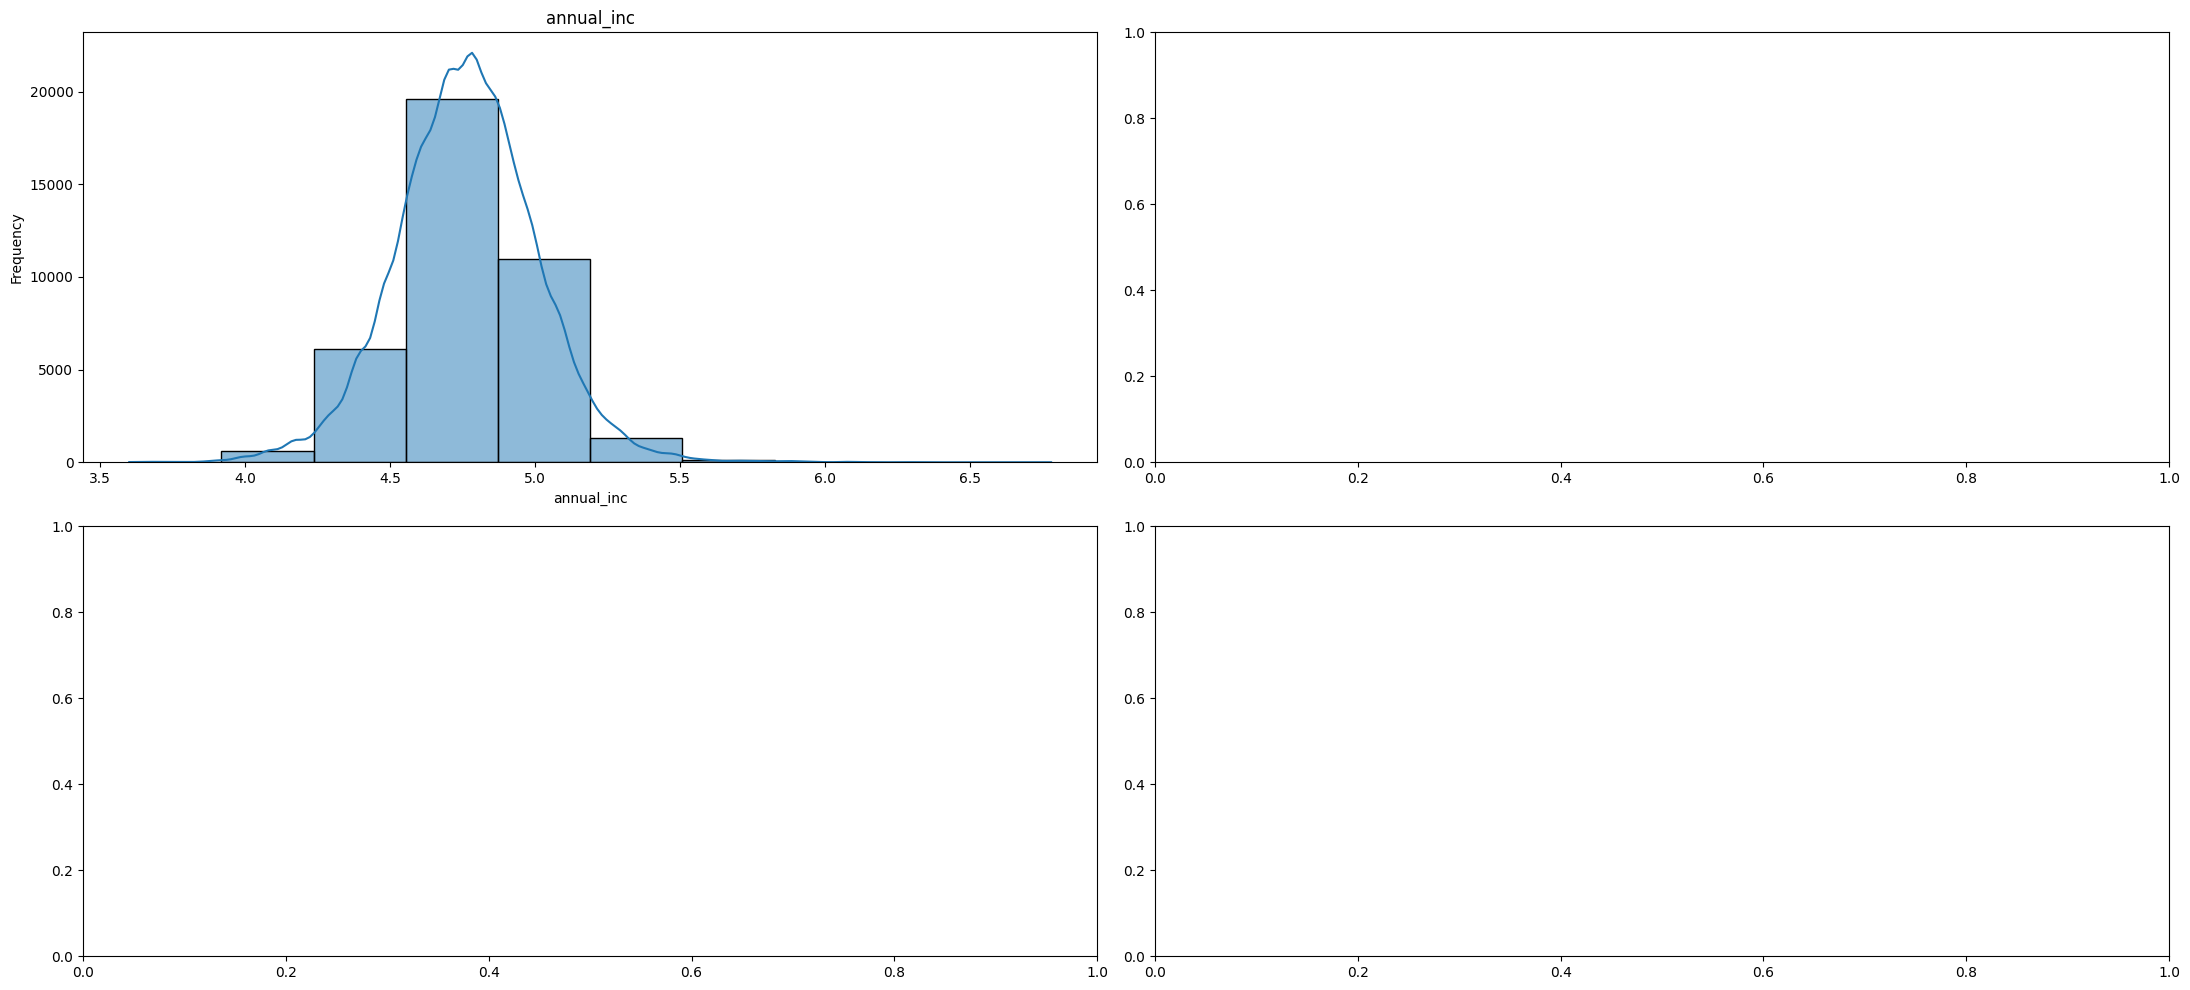

In [54]:
## Deep copy the dataframe to preserve progress so far
df_linear = df.copy(deep=True)

## left skewed features -- apply Log10 scaling
left_skewed_features = ['annual_inc']
log_transformer = FunctionTransformer(np.log10)

for col in left_skewed_features:
    #df_scaled[col] = df_scaled[col].apply(lambda x: np.log10(x) if x > 0 else 0)
    df_linear[col] = log_transformer.transform(df[[col]])
    vals = sorted(df_linear[col].unique().tolist())
    print(col, vals[0], vals[-1]) # check that there are no +/-inf

check_missing_values(df_linear)
showCountPlots(df_linear, left_skewed_features)

loan_amnt 0.0 0.9999999999999999
term 0.0 1.0
int_rate 0.0 0.9999999999999998
sub_grade 0.0 0.9999999999999999
emp_length 0.0 1.0
dti 0.0 1.0
delinq_2yrs 0.0 1.0
inq_last_6mths 0.0 1.0
open_acc 0.0 0.9999999999999998
pub_rec 0.0 1.0
revol_bal 0.0 1.0
revol_util 0.0 1.0
loan_status 0.0 1.0
closed_acc 0.0 0.9999999999999999
No nulls present in dataframe.


<Figure size 640x480 with 0 Axes>

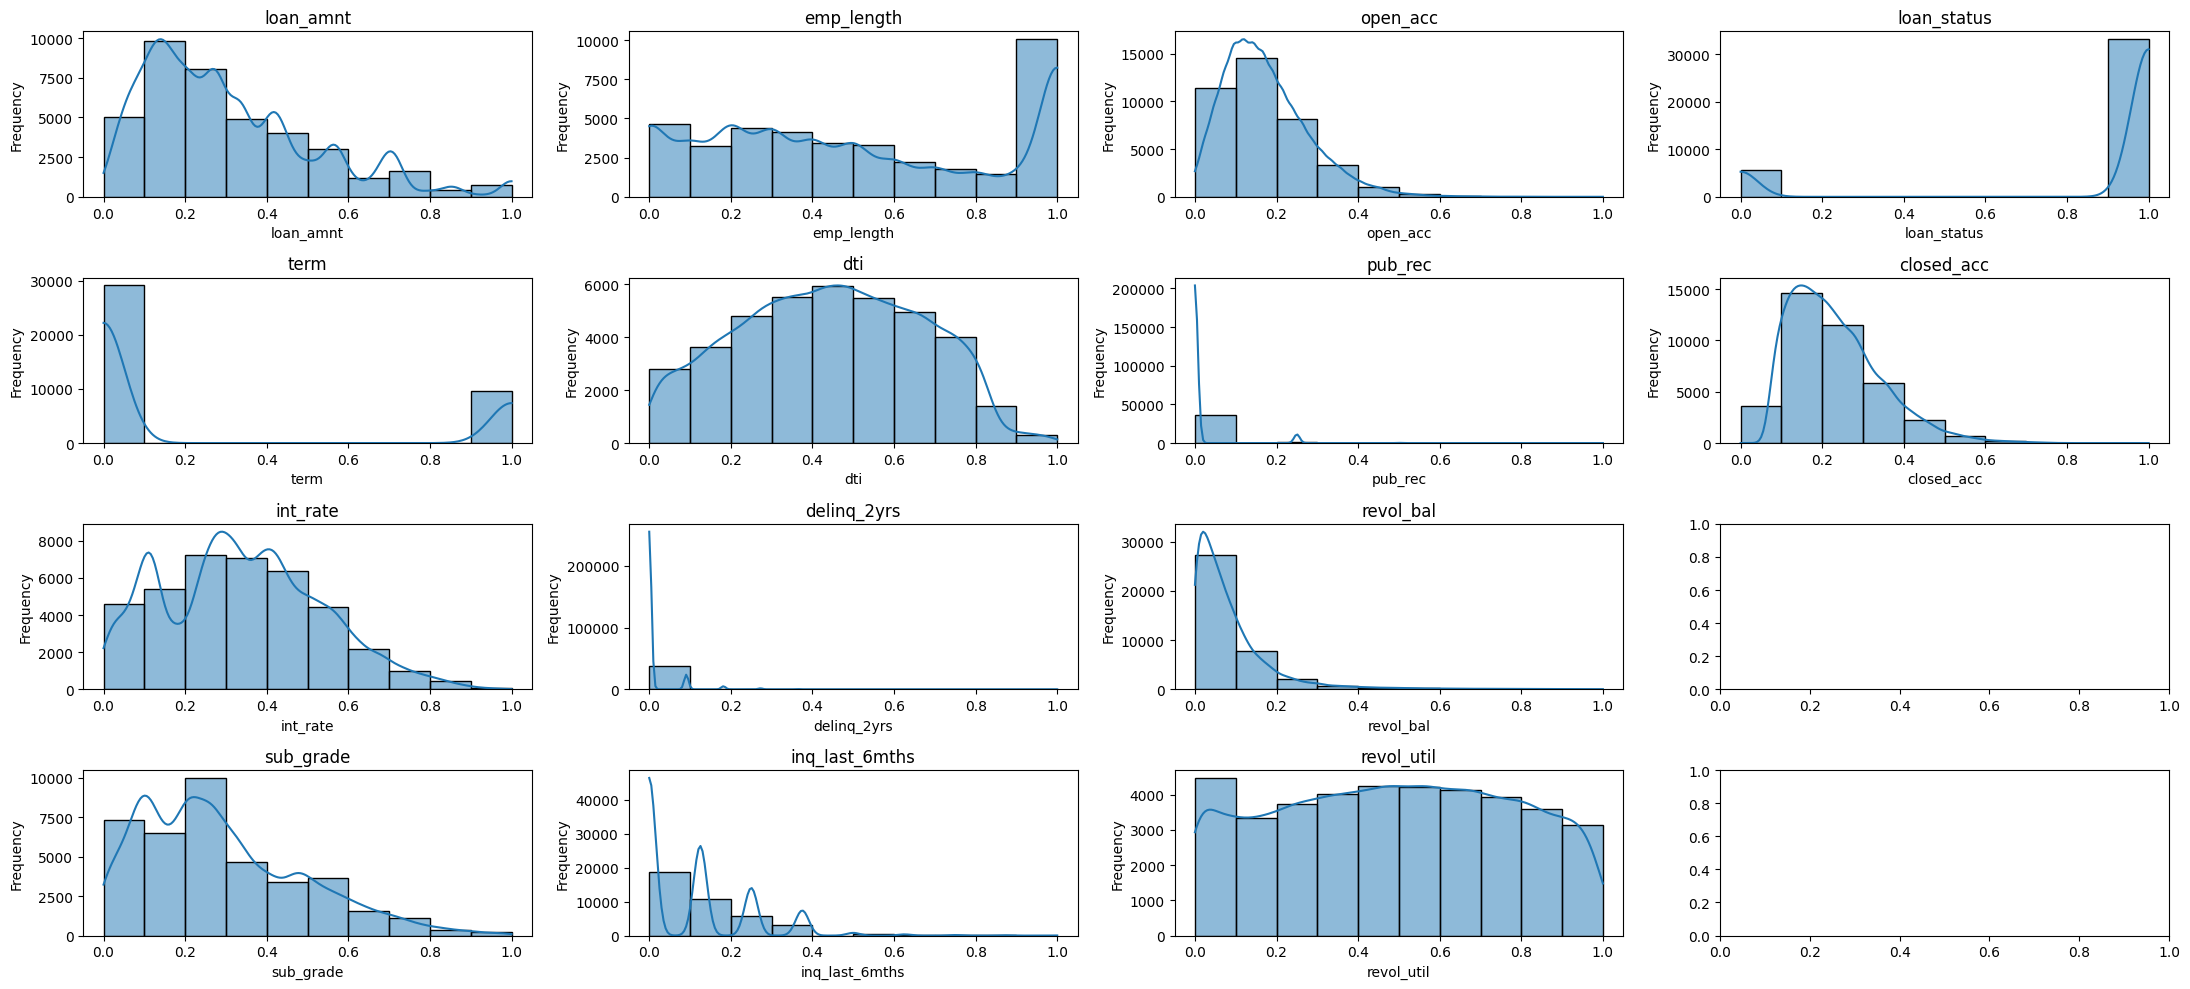

In [55]:
## MinMax Scaling - fit to equivalent scale
non_encoded_columns = getNonEncodedCols()
non_encoded_columns = [s for s in non_encoded_columns if s not in left_skewed_features]
minmax_scaler = MinMaxScaler()
for col in non_encoded_columns:
    df_linear[col] = minmax_scaler.fit_transform(df[[col]])
    vals = sorted(df_linear[col].unique().tolist())
    print(col, vals[0], vals[-1]) # check that there are no +/-inf

check_missing_values(df_linear)
showCountPlots(df_linear, non_encoded_columns)

In [56]:
# Separating the features and target for loan_status
X_linear = df_linear.drop(["loan_status"], axis=1)
X_linear.drop('int_rate', axis=1, inplace=True)

y_linear = df_linear["int_rate"]

In [57]:
# Separating the features and target for loan_status
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear,y_linear,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train_linear, y_train_linear)

# Make predictions on the test data
y_pred_linear = lr_model.predict(X_test_linear)
y_pred_linear

print("The best fit line is:",lr_model.coef_[0],"X+",lr_model.intercept_)

The best fit line is: 0.020751229490300636 X+ 0.0664175217700127


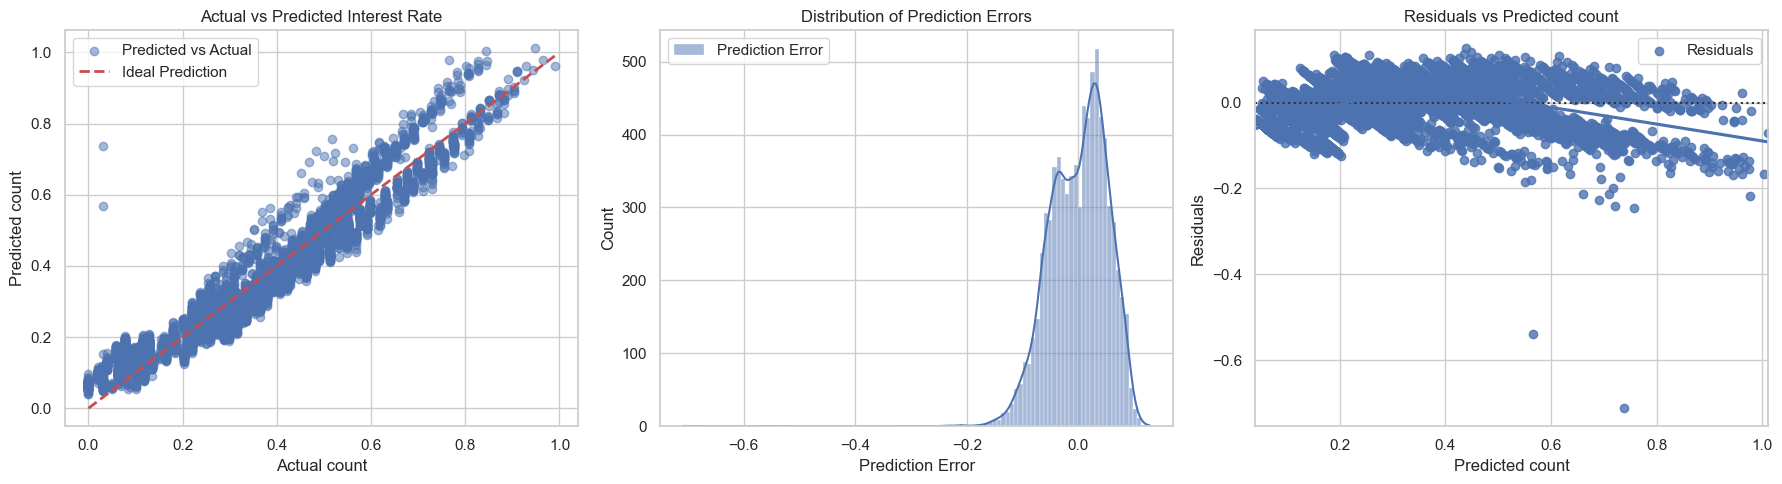

In [58]:
#Visualization of Regression Predictions
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot of actual vs predicted fares
axes[0].scatter(y_test_linear, y_pred_linear, alpha=0.5, label='Predicted vs Actual')
axes[0].plot([y_test_linear.min(), y_test_linear.max()], [y_test_linear.min(), y_test_linear.max()], '--r', linewidth=2, label='Ideal Prediction')
axes[0].set_xlabel('Actual count')
axes[0].set_ylabel('Predicted count')
axes[0].set_title('Actual vs Predicted Interest Rate')
axes[0].legend()

# Distribution plot of prediction errors
errors = y_test_linear - y_pred_linear
sns.histplot(errors, kde=True, ax=axes[1], label='Prediction Error')
axes[1].set_xlabel('Prediction Error')
axes[1].set_title('Distribution of Prediction Errors')
axes[1].legend()

# Residual plot
sns.residplot(x=y_pred_linear, y=errors, lowess=True, ax=axes[2], label='Residuals')
axes[2].set_xlabel('Predicted count')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residuals vs Predicted count')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

#### Interpretation:
#### Graph 1: Actual vs Predicted Count
- The predicted values follow the trend of the actual values, indicating that the model captures the overall relationship.
- There is limited scatter around the red dashed line (ideal prediction), splitting into two noticable groups at higher counts.  This suggests some relationship in the data that the model is not capturing.

#### Graph 2: Distribution of Prediction Errors
- Most errors are centered around zero, showing that the model's predictions are generally close to the actual values for many instances.

#### Graph 3: Residuals vs Predicted Count
- The residuals (errors) are mostly evenly distributed around the horizontal axis.  At higher levels, we can observe the bifurcation mentioned previously.
<hr><hr>

In [59]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Evaluate the model
mae = mean_absolute_error(y_test_linear, y_pred_linear)
mse = mean_squared_error(y_test_linear, y_pred_linear)
r2 = r2_score(y_test_linear, y_pred_linear)

# Print the evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 0.04197086075557231
Mean Squared Error (MSE): 0.0026392779356252108
R-squared (R2): 0.9298813008372406


In [60]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Add the intercept term
X_linear = sm.add_constant(X_linear)

# Splitting the data in 70:30 ratio of train to test data
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size = 0.30 , random_state = 1)

# Create the model
model1 = sm.OLS(y_train_linear, X_train_linear).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.090e+04
Date:                Sat, 30 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:43:05   Log-Likelihood:                 41832.
No. Observations:               27139   AIC:                        -8.360e+04
Df Residuals:                   27106   BIC:                        -8.333e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.0494      0.007      7.311      0.000       0.036       0.063
loan_amnt                               0.0233      0.002     11.613      0.000       0.019       0.027
term                                    0.0135      0.001     15.312      0.000       0.012       0.015
sub_grade                               0.8794      0.002    396.716      0.000       0.875       0.884
emp_length                              0.0021      0.001      2.285      0.022       0.000       0.004
annual_inc                             -0.0046      0.002     -2.663      0.008      -0.008      -0.001
dti                                     0.0017      0.002      1.051      0.293      -0.002       0.005
delinq_2yrs                             0.0529      0.007      7.121      0.000       0.038       0.067
inq_last_6mths                          0.0385      0.002     15.821      0.000       0.034       0.043
open_acc                                0.0059      0.004      1.648      0.099      -0.001       0.013
pub_rec                                 0.0232      0.005      4.306      0.000       0.013       0.034
revol_bal                              -0.0231      0.004     -6.268      0.000      -0.030      -0.016
revol_util                              0.0358      0.001     24.148      0.000       0.033       0.039
home_ownership_MORTGAGE                 0.0074      0.007      1.126      0.260      -0.006       0.020
home_ownership_NONE                     0.0002      0.030      0.006      0.996      -0.059       0.060
home_ownership_OTHER                    0.0164      0.008      1.989      0.047       0.000       0.033
home_ownership_OWN                      0.0123      0.007      1.847      0.065      -0.001       0.025
home_ownership_RENT                     0.0130      0.007      1.979      0.048       0.000       0.026
purpose_car                             0.0008      0.002      0.460      0.646      -0.003       0.004
purpose_credit_card                     0.0028      0.001      2.395      0.017       0.001       0.005
purpose_debt_consolidation              0.0030      0.001      3.129      0.002       0.001       0.005
purpose_educational                     0.0106      0.003      3.175      0.001       0.004       0.017
purpose_home_improvement                0.0027      0.001      1.963      0.050    3.82e-06       0.005
purpose_house                           0.0039      0.003      1.275      0.202      -0.002       0.010
purpose_major_purchase                 -0.0017      0.001     -1.113      0.266      -0.005       0.001
purpose_medical                         0.0016      0.002      0.667      0.505      -0.003       0.006
purpose_moving                          0.0068      0.003      2.67

## Observations
- The linear regression on the int_rate dependent variable acheives a highly predictive model at R-squared of .92.
- The credit rating strongly dominates the model.  FICO has been successfully used for decades so it comes as no surprise that this measure dominates our model.
- High F-statistic  and p-value (0.00) confirm the model is statistically significant.
- Adjusted R-squared and R-squared are equivalent meaning most if not all of the independent variables contribute to the model.

## Summary
- I decided to test models against two dependent variables: loan_status and int_rate.  The int_rate is intended to capture all risk in the loan.  It's usually set by analyzing the riskiness of the borrower and loan, just like our models do.  I wanted to make a model that simulates a real world excercise and therefore chose to treat it as a dependent variable.
- I spent more time on the loan_status model because 1) it was the main assigment and 2) the initial result of the int_rate model was high enough that I was happy with it.  I could probably take this further to increase the model's accuracy but am happy with the current result.
- For the loan_status model, the Random Forest and XGBoost algorithms gave us the best results, with Random Forest winning by a narrow margin.  At 92% accuracy, we can expect to avoid lending money to people who wouldn't be able to pay almost all of the time.
- I expected the sub_grade feature to dominate both models, but it did not.  For the loan_status model, the inq_last_6mths feature had the most predictive power.  sub_grade was the most predictive for the int_rate model though.
- I may be able to further tweak the results by trying different methods of Scaling & Imputing.  The Imputing likely wouldn't make much difference considering how little influence the two features w/ imputed values have on our models.
- I'd be interested to see how companies that actually employ these models fair.  How accurate does the model need to be for the company in fact to profitably write loans?

---

### ** Python libraries worth considering using**
  - **tqdm**: A Python library used to create progress bars for iterables. It provides visual feedback on the progress of long-running operations, making it easier to track the execution time and estimate the remaining time.
  - **Low-code learning libraries** Use lazypredict or PyCaret to compare the performance of multiple Machine Learning models simultaneously. *The best part is that you only need to write fewer than 10 lines of code.*
  - **Explainable AI**: Understand model decisions through techniques like LIME or SHAP.